<a href="https://colab.research.google.com/github/Nemipatel210/GIS/blob/main/ps2_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Interest

Research Interest:

My research interest is applying GIS and data science techniques to study agriculture and land use dynamics. Agriculture is influenced by various spatial and temporal factors, including crop growth patterns, soil quality, water availability, land cover change, and the economic value of land. By integrating spatial datasets such as land parcels, remote sensing imagery, crop statistics, socio-economic indicators, etc, I aim to explore how agricultural land use evolves and relates to broader drivers such as climate variability, population growth, and market demand.

#Area Of Interest

This cell installs the necessary libraries, `geopandas` and `mapclassify`, for working with geospatial data and creating thematic maps. The `%%capture` magic command is used to suppress the output of the installation process.

In [ ]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/

This cell imports the required Python libraries, including `os`, `zipfile` for file operations, `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for plotting, `geopandas` for geospatial data handling, and `mapclassify` for map classification. It also sets display options for the notebook.

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

This cell checks and displays the installed version of the `geopandas` library.

In [ ]:
#!python --version
gpd.__version__

'1.1.1'

This cell downloads a zip file containing Texas County Boundary shapefiles from a GitHub repository using the `wget` command.

In [ ]:
! wget -q -O Texas_County_Boundaries_4845315375211121464.zip https://raw.githubusercontent.com/Nemipatel210/GIS/6c673d7fa088d4803b52ba23025623d675de0a7f/Texas_County_Boundaries_4845315375211121464.zip

This cell unzips the downloaded Texas County Boundary shapefile.

In [ ]:
zip_ref = zipfile.ZipFile('Texas_County_Boundaries_4845315375211121464.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory to show the extracted shapefiles.

In [ ]:
!ls

County_Boundaries.cpg  County_Boundaries.shp.xml
County_Boundaries.dbf  County_Boundaries.shx
County_Boundaries.prj  sample_data
County_Boundaries.shp  Texas_County_Boundaries_4845315375211121464.zip


This cell reads the downloaded Texas County Boundary shapefile into a GeoDataFrame named `txC0` using `geopandas.read_file()`.

In [ ]:
txC0=gpd.read_file('County_Boundaries.shp')

This cell displays the first 5 rows of the `txC0` GeoDataFrame to inspect its structure and data.

In [ ]:
txC0.head(5)

CMPTRL_CNT  DPS_CNTY_N FIPS_ST_CN  TXDOT_CNTY  TXDOT_DIST   CNTY_NM  \
0         232         232      48463         232          15    Uvalde   
1         143         143      48285         143          13    Lavaca   
2          20          20      48039          20          12  Brazoria   
3         241         241      48481         241          13   Wharton   
4         163         163      48325         163          15    Medina   

   CNTY_NBR  DIST_NBR  GID                                           geometry  
0       232        15   35  POLYGON ((-11076323.621 3386738.492, -11076452...  
1       143        13   36  POLYGON ((-10783021.183 3456095.21, -10783006....  
2        20        12   37  POLYGON ((-10606980.495 3451945.262, -10606969...  
3       241        13   38  POLYGON ((-10706181.772 3456563.942, -10706152...  
4       163        15   39  POLYGON ((-11066621.012 3397753.016, -11066621...

The map displays a geographical outline of the state of **Texas**, with its internal borders divided by county. The coordinates on the axes indicate a projected coordinate system, likely used in data analysis for plotting location-based information.

<Axes: >

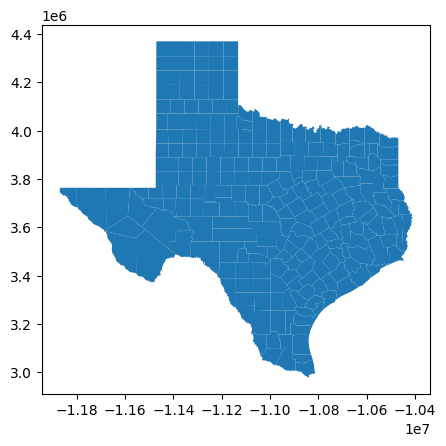

In [ ]:
txC0.plot()

#Plotting Thematic Map

This cell downloads another zip file containing Texas County Cartographic shapefiles and unzips it.

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O TexasCountiesCartographic.zip https://github.com/Nemipatel210/GIS/raw/59bf3c13164b92498dd27aaef7783f833d5a1852/TexasCountiesCartographic.zip
zip_ref = zipfile.ZipFile('TexasCountiesCartographic.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory again to show the newly extracted shapefiles.

In [ ]:
!ls

County_Boundaries.cpg
County_Boundaries.dbf
County_Boundaries.prj
County_Boundaries.shp
County_Boundaries.shp.xml
County_Boundaries.shx
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.cpg
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.dbf
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.prj
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shx
sample_data
TexasCountiesCartographic.zip
Texas_County_Boundaries_4845315375211121464.zip


This cell reads the newly downloaded Texas County Cartographic shapefile into a GeoDataFrame named `txC1`.

In [ ]:
txC1=gpd.read_file('geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp')

This cell displays information about the `txC1` GeoDataFrame, including the column names, non-null counts, and data types.

In [ ]:
txC1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   254 non-null    object  
 1   countyfp  254 non-null    object  
 2   countyns  254 non-null    object  
 3   affgeoid  254 non-null    object  
 4   geoid     254 non-null    object  
 5   name      254 non-null    object  
 6   lsad      254 non-null    object  
 7   aland     254 non-null    object  
 8   awater    254 non-null    object  
 9   geometry  254 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.0+ KB


This cell displays the first 10 rows of the `txC1` GeoDataFrame to inspect its structure and data, including column names like 'name' and 'aland'.

In [ ]:
txC1.head(10)

statefp countyfp  countyns        affgeoid  geoid       name lsad  \
0      48      421  01383996  0500000US48421  48421    Sherman   06   
1      48      493  01384032  0500000US48493  48493     Wilson   06   
2      48      115  01383843  0500000US48115  48115     Dawson   06   
3      48      069  01383820  0500000US48069  48069     Castro   06   
4      48      279  01383926  0500000US48279  48279       Lamb   06   
5      48      385  01383978  0500000US48385  48385       Real   06   
6      48      359  01383965  0500000US48359  48359     Oldham   06   
7      48      127  01383849  0500000US48127  48127     Dimmit   06   
8      48      305  01383938  0500000US48305  48305       Lynn   06   
9      48      171  01383871  0500000US48171  48171  Gillespie   06   

        aland    awater                                           geometry  
0  2390651189    428754  POLYGON ((-102.16246 36.50033, -102.03234 36.5...  
1  2081662847  12111367  POLYGON ((-98.40734 29.11444, -98.13417 29.441...  
2  2331781556   4720730  POLYGON ((-102.20852 32.95896, -102.07621 32.9...  
3  2316573415  12584396  POLYGON ((-102.52518 34.74693, -102.16884 34.7...  
4  2631897577   3973764  POLYGON ((-102.61515 34.31289, -102.52563 34.3...  
5  1810812906   2346258  POLYGON ((-100.03088 29.84827, -100.0023 29.89...  
6  3886337121   2339716  POLYGON ((-103.04155 35.62249, -103.04155 35.6...  
7  3441795365  14576538  POLYGON ((-100.11434 28.64812, -99.40902 28.64...  
8  2309924845   4169719  POLYGON ((-102.07593 33.38959, -101.55688 33.3...  
9  2740716834   9015052  POLYGON ((-99.304 30.49983, -98.96423 30.49848...

## Thematic Map of Land Area by County

The map shows the land area of each of Texas's 254 counties. The color of each county corresponds to its size in square meters, with the smallest counties appearing dark purple and the largest counties, particularly in West Texas, appearing yellow. For example, Brewster County is the largest county, and its size is over 6,100 square miles (or over 16,000 square kilometers). In contrast, the smallest county, Rockwall County, is less than 150 square miles. The map visually demonstrates the vast difference in land area between Texas counties.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Land Area by County')

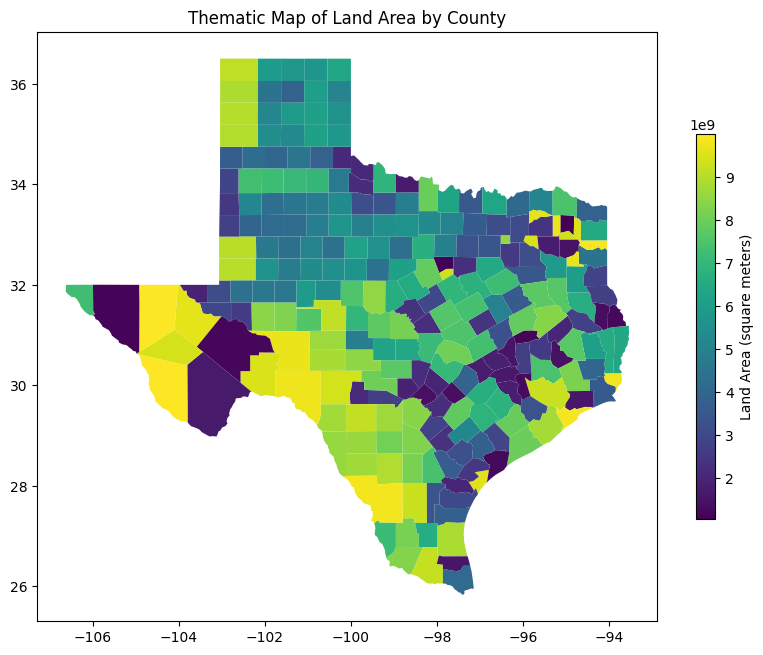

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='aland', ax=ax, cmap='viridis')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=txC1['aland'].min(), vmax=txC1['aland'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Land Area (square meters)')


ax.set_title('Thematic Map of Land Area by County')
plt.show()

## Thematic Map of water Area by County

This is a thematic map of Texas that visualizes the amount of water area within each county. The map uses a color gradient of blues, where darker shades represent a greater surface area of water, while lighter shades and white indicate less water. The legend on the right confirms that the measurement is in square meters. The map's pattern clearly shows that counties in the eastern and southeastern parts of the state, where major reservoirs, lakes, and rivers are located, have a significantly larger water area. In contrast, counties in the arid western and panhandle regions contain very little surface water, appearing as light blue or white on the map. This visual representation effectively highlights the geographical distribution of Texas's water resources.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Water Area by County')

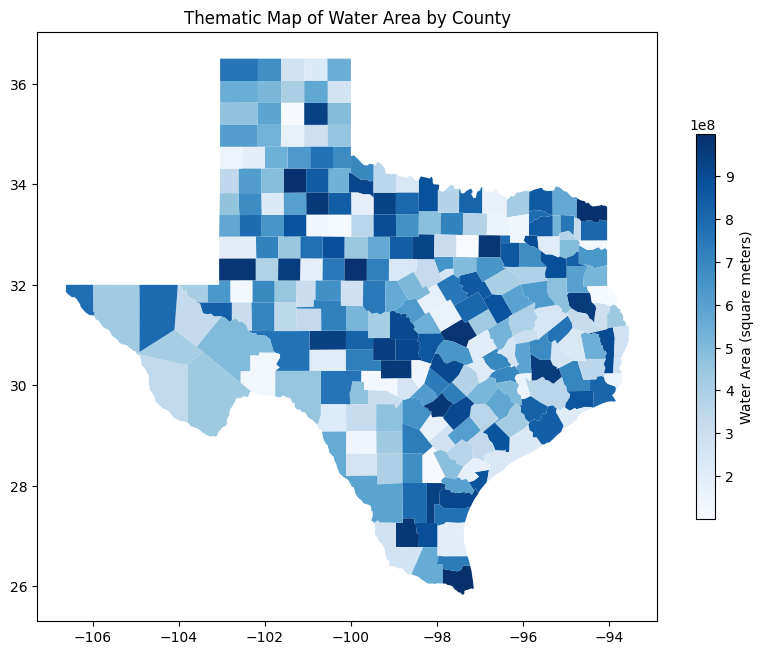

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='awater', ax=ax, cmap='Blues')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=txC1['awater'].min(), vmax=txC1['awater'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Water Area (square meters)')


ax.set_title('Thematic Map of Water Area by County')
plt.show()

#Merging (old one)

In [ ]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/984dcc3aa5ee5cb814d0f6fe0653ce9c8ca02af3/croptotal2022.csv'
crop2022_df = pd.read_csv(url)
display(crop2022_df.head(5))

Program  Year Period  Week Ending Geo Level  State  State ANSI Ag District  \
0  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
1  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
2  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
3  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
4  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   

   Ag District Code   County  ...  Zip Code  Region  watershed_code  \
0                40     BELL  ...       NaN     NaN               0   
1                40   BOSQUE  ...       NaN     NaN               0   
2                40   COLLIN  ...       NaN     NaN               0   
3                40    COOKE  ...       NaN     NaN               0   
4                40  CORYELL  ...       NaN     NaN               0   

   Watershed    Commodity                           Data Item Domain  \
0        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
1        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
2        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
3        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
4        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   

  Domain Category       Value CV (%)  
0   NOT SPECIFIED  49,734,000    (L)  
1   NOT SPECIFIED  21,771,000    (L)  
2   NOT SPECIFIED  45,111,000    (L)  
3   NOT SPECIFIED  19,860,000    (L)  
4   NOT SPECIFIED  16,052,000    (L)  

[5 rows x 21 columns]

In [ ]:
print("Number of rows in crop2022_df:", crop2022_df.shape[0])

Number of rows in crop2022_df: 254


In [ ]:
print("Number of rows in tx:", txC0.shape[0])

Number of rows in tx: 254


In [ ]:
tx = txC0.sort_values('CNTY_NM')
crop2022_df = crop2022_df.sort_values('County')


In [ ]:
tx['CNTY_NM'] = tx['CNTY_NM'].str.upper()
crop2022_df['County'] = crop2022_df['County'].str.upper()

In [ ]:
tx.head(5)

CMPTRL_CNT  DPS_CNTY_N FIPS_ST_CN  TXDOT_CNTY  TXDOT_DIST   CNTY_NM  \
155           1           1      48001           1          10  ANDERSON   
101           2           2      48003           2           6   ANDREWS   
124           3           3      48005           3          11  ANGELINA   
82            4           4      48007           4          16   ARANSAS   
222           5           5      48009           5           3    ARCHER   

     CNTY_NBR  DIST_NBR  GID  \
155         1        10  136   
101         2         6  155   
124         3        11  105   
82          4        16   15   
222         5         3  208   

                                              geometry  
155  POLYGON ((-10622770.07 3774372.952, -10622743....  
101  POLYGON ((-11452352.064 3832169.96, -11452055....  
124  POLYGON ((-10560243.006 3701241.912, -10560220...  
82   POLYGON ((-10775558.316 3283921.376, -10776779...  
222  POLYGON ((-10956443.534 3973368.927, -10956442...

In [ ]:
crop2022_df.head(5)

Program  Year Period  Week Ending Geo Level  State  State ANSI  \
49   CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48   
199  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48   
73   CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48   
25   CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48   
30   CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48   

              Ag District  Ag District Code    County  ...  Zip Code  Region  \
49       EAST TEXAS NORTH                51  ANDERSON  ...       NaN     NaN   
199  SOUTHERN HIGH PLAINS                12   ANDREWS  ...       NaN     NaN   
73       EAST TEXAS SOUTH                52  ANGELINA  ...       NaN     NaN   
25           COASTAL BEND                82   ARANSAS  ...       NaN     NaN   
30          CROSS TIMBERS                30    ARCHER  ...       NaN     NaN   

     watershed_code  Watershed    Commodity  \
49                0        NaN  CROP TOTALS   
199               0        NaN  CROP TOTALS   
73                0        NaN  CROP TOTALS   
25                0        NaN  CROP TOTALS   
30                0        NaN  CROP TOTALS   

                              Data Item Domain Domain Category       Value  \
49   CROP TOTALS - SALES, MEASURED IN $  TOTAL   NOT SPECIFIED  24,811,000   
199  CROP TOTALS - SALES, MEASURED IN $  TOTAL   NOT SPECIFIED   5,343,000   
73   CROP TOTALS - SALES, MEASURED IN $  TOTAL   NOT SPECIFIED   6,298,000   
25   CROP TOTALS - SALES, MEASURED IN $  TOTAL   NOT SPECIFIED     688,000   
30   CROP TOTALS - SALES, MEASURED IN $  TOTAL   NOT SPECIFIED   8,344,000   

    CV (%)  
49     (L)  
199    (L)  
73     (L)  
25     (L)  
30     (L)  

[5 rows x 21 columns]

In [ ]:
tx_crop2022 = tx.merge(crop2022_df, left_on='CNTY_NM', right_on='County', how='inner')

In [ ]:
tx_crop2022_plot = tx_crop2022[['CNTY_NM', 'geometry', 'Value']]
display(tx_crop2022_plot.head(5))

CNTY_NM                                           geometry       Value
0  ANDERSON  POLYGON ((-10622770.07 3774372.952, -10622743....  24,811,000
1   ANDREWS  POLYGON ((-11452352.064 3832169.96, -11452055....   5,343,000
2  ANGELINA  POLYGON ((-10560243.006 3701241.912, -10560220...   6,298,000
3   ARANSAS  POLYGON ((-10775558.316 3283921.376, -10776779...     688,000
4    ARCHER  POLYGON ((-10956443.534 3973368.927, -10956442...   8,344,000

In [ ]:
tx_crop2022_plot['Value'] = tx_crop2022_plot['Value'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False)
tx_crop2022_plot['Value'] = pd.to_numeric(tx_crop2022_plot['Value'])
display(tx_crop2022_plot.head())

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


CNTY_NM                                           geometry       Value
0  ANDERSON  POLYGON ((-10622770.07 3774372.952, -10622743....  24811000.0
1   ANDREWS  POLYGON ((-11452352.064 3832169.96, -11452055....   5343000.0
2  ANGELINA  POLYGON ((-10560243.006 3701241.912, -10560220...   6298000.0
3   ARANSAS  POLYGON ((-10775558.316 3283921.376, -10776779...    688000.0
4    ARCHER  POLYGON ((-10956443.534 3973368.927, -10956442...   8344000.0

In [ ]:
tx_crop2022_plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CNTY_NM   254 non-null    object  
 1   geometry  254 non-null    geometry
 2   Value     244 non-null    float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 6.1+ KB


In [ ]:
txC1['name'] = txC1['name'].str.upper()
txC1_crop2022 = txC1.merge(tx_crop2022, left_on='name', right_on='CNTY_NM', how='inner')
display(txC1_crop2022.head(5))

statefp countyfp  countyns        affgeoid  geoid     name lsad       aland  \
0      48      421  01383996  0500000US48421  48421  SHERMAN   06  2390651189   
1      48      493  01384032  0500000US48493  48493   WILSON   06  2081662847   
2      48      115  01383843  0500000US48115  48115   DAWSON   06  2331781556   
3      48      069  01383820  0500000US48069  48069   CASTRO   06  2316573415   
4      48      279  01383926  0500000US48279  48279     LAMB   06  2631897577   

     awater                                         geometry_x  ...  Zip Code  \
0    428754  POLYGON ((-102.16246 36.50033, -102.03234 36.5...  ...       NaN   
1  12111367  POLYGON ((-98.40734 29.11444, -98.13417 29.441...  ...       NaN   
2   4720730  POLYGON ((-102.20852 32.95896, -102.07621 32.9...  ...       NaN   
3  12584396  POLYGON ((-102.52518 34.74693, -102.16884 34.7...  ...       NaN   
4   3973764  POLYGON ((-102.61515 34.31289, -102.52563 34.3...  ...       NaN   

   Region watershed_code  Watershed    Commodity  \
0     NaN              0        NaN  CROP TOTALS   
1     NaN              0        NaN  CROP TOTALS   
2     NaN              0        NaN  CROP TOTALS   
3     NaN              0        NaN  CROP TOTALS   
4     NaN              0        NaN  CROP TOTALS   

                            Data Item  Domain  Domain Category        Value  \
0  CROP TOTALS - SALES, MEASURED IN $   TOTAL    NOT SPECIFIED  190,706,000   
1  CROP TOTALS - SALES, MEASURED IN $   TOTAL    NOT SPECIFIED   12,872,000   
2  CROP TOTALS - SALES, MEASURED IN $   TOTAL    NOT SPECIFIED   49,659,000   
3  CROP TOTALS - SALES, MEASURED IN $   TOTAL    NOT SPECIFIED   96,353,000   
4  CROP TOTALS - SALES, MEASURED IN $   TOTAL    NOT SPECIFIED   78,896,000   

  CV (%)  
0    (L)  
1    (L)  
2    (L)  
3    (L)  
4    (L)  

[5 rows x 41 columns]

In [ ]:
txC1_crop2022_selected = txC1_crop2022[['aland', 'geometry_x', 'Value', 'name']]
display(txC1_crop2022_selected.head())

aland                                         geometry_x        Value  \
0  2390651189  POLYGON ((-102.16246 36.50033, -102.03234 36.5...  190,706,000   
1  2081662847  POLYGON ((-98.40734 29.11444, -98.13417 29.441...   12,872,000   
2  2331781556  POLYGON ((-102.20852 32.95896, -102.07621 32.9...   49,659,000   
3  2316573415  POLYGON ((-102.52518 34.74693, -102.16884 34.7...   96,353,000   
4  2631897577  POLYGON ((-102.61515 34.31289, -102.52563 34.3...   78,896,000   

      name  
0  SHERMAN  
1   WILSON  
2   DAWSON  
3   CASTRO  
4     LAMB

In [ ]:
txC1_crop2022_selected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   aland       253 non-null    object  
 1   geometry_x  253 non-null    geometry
 2   Value       253 non-null    object  
 3   name        253 non-null    object  
dtypes: geometry(1), object(3)
memory usage: 8.0+ KB


In [ ]:
txC1_crop2022_selected['Value'] = pd.to_numeric(txC1_crop2022_selected['Value'].astype(str).str.replace(',', '', regex=False), errors='coerce')
txC1_crop2022_selected['aland'] = pd.to_numeric(txC1_crop2022_selected['aland'], errors='coerce')
txC1_crop2022_selected['value_density'] = txC1_crop2022_selected['Value'] / txC1_crop2022_selected['aland']
display(txC1_crop2022_selected.head(5))

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


aland                                         geometry_x        Value  \
0  2390651189  POLYGON ((-102.16246 36.50033, -102.03234 36.5...  190706000.0   
1  2081662847  POLYGON ((-98.40734 29.11444, -98.13417 29.441...   12872000.0   
2  2331781556  POLYGON ((-102.20852 32.95896, -102.07621 32.9...   49659000.0   
3  2316573415  POLYGON ((-102.52518 34.74693, -102.16884 34.7...   96353000.0   
4  2631897577  POLYGON ((-102.61515 34.31289, -102.52563 34.3...   78896000.0   

      name  value_density  
0  SHERMAN       0.079772  
1   WILSON       0.006184  
2   DAWSON       0.021297  
3   CASTRO       0.041593  
4     LAMB       0.029977

This thematic map of Texas illustrates the density of crop value for each county. The map uses a color gradient from light yellow to dark blue to represent the value of crops per unit of land area. Counties in light yellow have the lowest crop value density, which is common in the arid western and panhandle regions, where the landscape is less suited for farming. In contrast, the counties with the highest crop value density are shaded in dark blue and are concentrated in the fertile, agriculturally rich areas of Central, Eastern, and Southern Texas, including the Gulf Coast, indicating a much higher crop output and value per square meter in these regions. The map effectively visualizes the significant geographical differences in agricultural productivity across the state.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value Density by County')

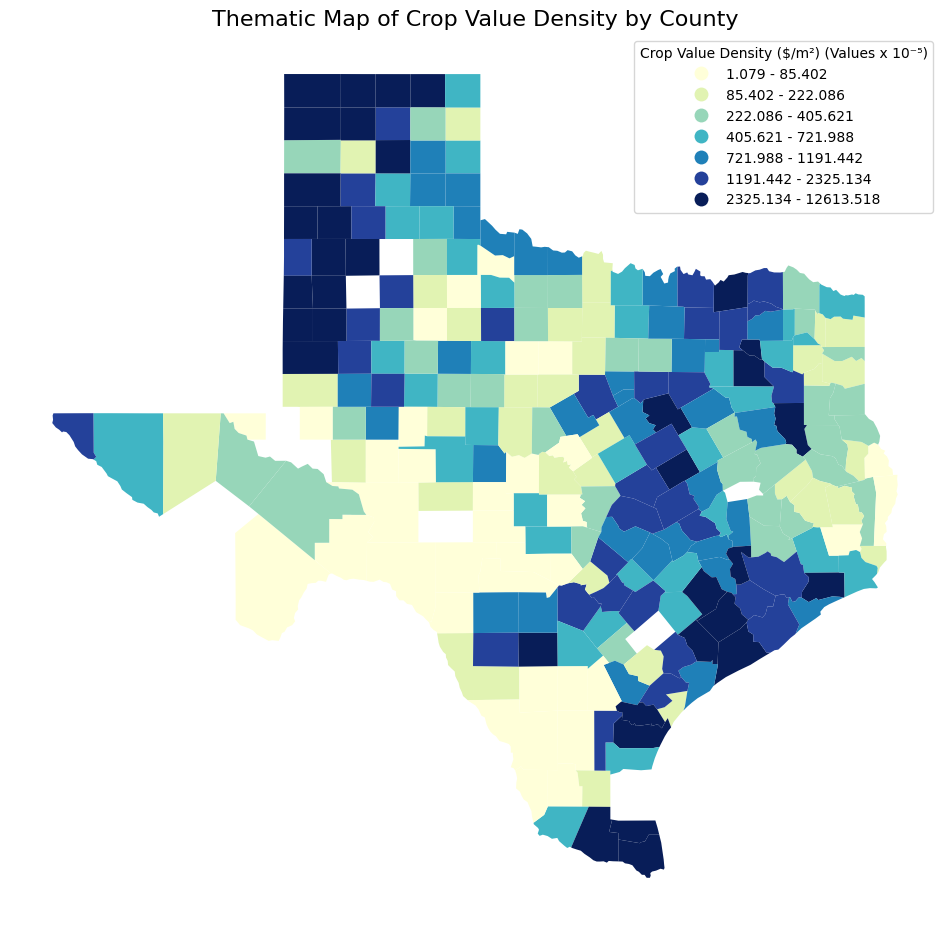

In [ ]:
import mapclassify
import matplotlib.pyplot as plt

# Drop rows with NaN in 'value_density' before plotting
txC1_crop2022_selected_plot = txC1_crop2022_selected.dropna(subset=['value_density']).set_geometry('geometry_x')

# Define the classification scheme (e.g., Quantiles) and number of classes
k_classes = 7
classifier = mapclassify.Quantiles(txC1_crop2022_selected_plot['value_density'], k=k_classes)

# Scale the bin boundaries by 10^5 and format the legend labels
# The values are already multiplied by 10^5 in the prompt's legend, so we multiply the bins by 10^5
scaled_bins = [b * 1e5 for b in classifier.bins]
scaled_min = txC1_crop2022_selected_plot["value_density"].min() * 1e5
legend_labels = []

# Create the first label with the minimum value
legend_labels.append(f'{scaled_min:.3f} - {scaled_bins[0]:.3f}')

# Create subsequent labels
for i in range(1, len(scaled_bins)):
    legend_labels.append(f'{scaled_bins[i-1]:.3f} - {scaled_bins[i]:.3f}')

# The last bin's upper bound is the maximum value in the dataset
legend_labels[-1] = f'{scaled_bins[-2]:.3f} - {txC1_crop2022_selected_plot["value_density"].max() * 1e5:.3f}'


# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the defined classification
txC1_crop2022_selected_plot.plot(column='value_density',
                                 ax=ax,
                                 legend=True,
                                 cmap='YlGnBu',
                                 scheme='Quantiles',
                                 classification_kwds={'k': k_classes},
                                 legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                              'title': 'Crop Value Density ($/m²) (Values x 10⁻⁵)'})


ax.set_title('Thematic Map of Crop Value Density by County', fontsize=16)
ax.set_axis_off()
plt.show()

In [ ]:
# Convert 'aland' to numeric if it's not already
txC1_crop2022_selected['aland'] = pd.to_numeric(txC1_crop2022_selected['aland'], errors='coerce')

# Find the index of the county with the highest land area
max_aland_county_index = txC1_crop2022_selected['aland'].idxmax()

# Find the index of the county with the lowest land area
min_aland_county_index = txC1_crop2022_selected['aland'].idxmin()

# Get the county with the highest land area
county_highest_aland = txC1_crop2022_selected.loc[max_aland_county_index]

# Get the county with the lowest land area
county_lowest_aland = txC1_crop2022_selected.loc[min_aland_county_index]

print("County with the highest land area:")
display(county_highest_aland[['name', 'aland']])

print("\nCounty with the lowest land area:")
display(county_lowest_aland[['name', 'aland']])

County with the highest land area:


/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


name        BREWSTER
aland    16015869999
Name: 182, dtype: object


County with the lowest land area:


name      ROCKWALL
aland    329205133
Name: 39, dtype: object

In [ ]:
# Convert 'awater' to numeric if it's not already
txC1_crop2022['awater'] = pd.to_numeric(txC1_crop2022['awater'], errors='coerce')

# Find the index of the county with the highest water area
max_awater_county_index = txC1_crop2022['awater'].idxmax()

# Find the index of the county with the lowest water area
min_awater_county_index = txC1_crop2022['awater'].idxmin()

# Get the county with the highest water area
county_highest_awater = txC1_crop2022.loc[max_awater_county_index]

# Get the county with the lowest water area
county_lowest_awater = txC1_crop2022.loc[min_awater_county_index]

print("County with the highest water area:")
display(county_highest_awater[['name', 'awater']])

print("\nCounty with the lowest water area:")
display(county_lowest_awater[['name', 'awater']])

County with the highest water area:


name         CALHOUN
awater    1361884769
Name: 96, dtype: object


County with the lowest water area:


name      YOAKUM
awater     34329
Name: 183, dtype: object

#Merging (Updated One)

In [ ]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/d6ed8efcfb64d4825796df322005e76aa96f954f/agri_land_area.csv'
area_2022_df = pd.read_csv(url)
display(area_2022_df.head(5))

Program  Year Period  Week Ending Geo Level  State  State ANSI Ag District  \
0  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
1  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
2  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
3  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
4  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   

   Ag District Code   County  ...  Zip Code  Region  watershed_code  \
0                40     BELL  ...       NaN     NaN               0   
1                40   BOSQUE  ...       NaN     NaN               0   
2                40   COLLIN  ...       NaN     NaN               0   
3                40    COOKE  ...       NaN     NaN               0   
4                40  CORYELL  ...       NaN     NaN               0   

   Watershed  Commodity        Data Item             Domain  \
0        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
1        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
2        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
3        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
4        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   

                         Domain Category   Value CV (%)  
0  IRRIGATION STATUS: (ANY ON OPERATION)   5,583   22.9  
1  IRRIGATION STATUS: (ANY ON OPERATION)  37,171   22.9  
2  IRRIGATION STATUS: (ANY ON OPERATION)   7,657   22.9  
3  IRRIGATION STATUS: (ANY ON OPERATION)  35,026   22.9  
4  IRRIGATION STATUS: (ANY ON OPERATION)  43,180   22.9  

[5 rows x 21 columns]

In [ ]:
area_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           253 non-null    object 
 1   Year              253 non-null    int64  
 2   Period            253 non-null    object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         253 non-null    object 
 5   State             253 non-null    object 
 6   State ANSI        253 non-null    int64  
 7   Ag District       253 non-null    object 
 8   Ag District Code  253 non-null    int64  
 9   County            253 non-null    object 
 10  County ANSI       253 non-null    int64  
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    253 non-null    int64  
 14  Watershed         0 non-null      float64
 15  Commodity         253 non-null    object 
 16  Data Item         253 non-null    object 
 1

In [ ]:
merged_df = area_2022_df.merge(tx_crop2022_plot, left_on='County', right_on='CNTY_NM', how='outer', indicator=True)
display(merged_df.head())

Program    Year Period  Week Ending Geo Level  State  State ANSI  \
0  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
1  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
2  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
3  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
4  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   

            Ag District  Ag District Code    County  ...  Commodity  \
0      EAST TEXAS NORTH              51.0  ANDERSON  ...    AG LAND   
1  SOUTHERN HIGH PLAINS              12.0   ANDREWS  ...    AG LAND   
2      EAST TEXAS SOUTH              52.0  ANGELINA  ...    AG LAND   
3          COASTAL BEND              82.0   ARANSAS  ...    AG LAND   
4         CROSS TIMBERS              30.0    ARCHER  ...    AG LAND   

         Data Item             Domain                        Domain Category  \
0  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
1  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
2  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
3  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
4  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   

   Value_x CV (%)   CNTY_NM  \
0   32,469   22.9  ANDERSON   
1  156,497   22.9   ANDREWS   
2    1,722   22.9  ANGELINA   
3       63   22.9   ARANSAS   
4   46,951   22.9    ARCHER   

                                            geometry     Value_y _merge  
0  POLYGON ((-10622770.07 3774372.952, -10622743....  24811000.0   both  
1  POLYGON ((-11452352.064 3832169.96, -11452055....   5343000.0   both  
2  POLYGON ((-10560243.006 3701241.912, -10560220...   6298000.0   both  
3  POLYGON ((-10775558.316 3283921.376, -10776779...    688000.0   both  
4  POLYGON ((-10956443.534 3973368.927, -10956442...   8344000.0   both  

[5 rows x 25 columns]

In [107]:
merged_df_selected = merged_df[['County', 'Value_x', 'Value_y', 'geometry']]
display(merged_df_selected.head())

County  Value_x     Value_y  \
0  ANDERSON   32,469  24811000.0   
1   ANDREWS  156,497   5343000.0   
2  ANGELINA    1,722   6298000.0   
3   ARANSAS       63    688000.0   
4    ARCHER   46,951   8344000.0   

                                            geometry  
0  POLYGON ((-10622770.07 3774372.952, -10622743....  
1  POLYGON ((-11452352.064 3832169.96, -11452055....  
2  POLYGON ((-10560243.006 3701241.912, -10560220...  
3  POLYGON ((-10775558.316 3283921.376, -10776779...  
4  POLYGON ((-10956443.534 3973368.927, -10956442...

In [109]:
merged_df_selected['Value_x'] = pd.to_numeric(merged_df_selected['Value_x'].astype(str).str.replace(',', '', regex=False).str.replace(r'\(D\)', '', regex=True), errors='coerce')
merged_df_selected['Value_y'] = pd.to_numeric(merged_df_selected['Value_y'].astype(str).str.replace(',', '', regex=False).str.replace(r'\(D\)', '', regex=True), errors='coerce')
display(merged_df_selected.head())

/tmp/ipython-input-972204106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected['Value_x'] = pd.to_numeric(merged_df_selected['Value_x'].astype(str).str.replace(',', '', regex=False).str.replace(r'\(D\)', '', regex=True), errors='coerce')
/tmp/ipython-input-972204106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected['Value_y'] = pd.to_numeric(merged_df_selected['Value_y'].astype(str).str.replace(',', '', regex=False).str.replace(r'\(D\)', '', regex=True), errors='coe

County   Value_x     Value_y  \
0  ANDERSON   32469.0  24811000.0   
1   ANDREWS  156497.0   5343000.0   
2  ANGELINA    1722.0   6298000.0   
3   ARANSAS      63.0    688000.0   
4    ARCHER   46951.0   8344000.0   

                                            geometry  
0  POLYGON ((-10622770.07 3774372.952, -10622743....  
1  POLYGON ((-11452352.064 3832169.96, -11452055....  
2  POLYGON ((-10560243.006 3701241.912, -10560220...  
3  POLYGON ((-10775558.316 3283921.376, -10776779...  
4  POLYGON ((-10956443.534 3973368.927, -10956442...

In [113]:
merged_df_selected['value_ratio'] = merged_df_selected['Value_y'] / merged_df_selected['Value_x']
merged_df_selected['value_ratio'] = merged_df_selected['value_ratio'].fillna(0).astype(int)
display(merged_df_selected.head())

/tmp/ipython-input-3172118726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected['value_ratio'] = merged_df_selected['Value_y'] / merged_df_selected['Value_x']
/tmp/ipython-input-3172118726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected['value_ratio'] = merged_df_selected['value_ratio'].fillna(0).astype(int) # Removed as per explanation


County   Value_x     Value_y  \
0  ANDERSON   32469.0  24811000.0   
1   ANDREWS  156497.0   5343000.0   
2  ANGELINA    1722.0   6298000.0   
3   ARANSAS      63.0    688000.0   
4    ARCHER   46951.0   8344000.0   

                                            geometry  value_ratio  
0  POLYGON ((-10622770.07 3774372.952, -10622743....          764  
1  POLYGON ((-11452352.064 3832169.96, -11452055....           34  
2  POLYGON ((-10560243.006 3701241.912, -10560220...         3657  
3  POLYGON ((-10775558.316 3283921.376, -10776779...        10920  
4  POLYGON ((-10956443.534 3973368.927, -10956442...          177

In [115]:
# Find the index of the row with the maximum 'value_ratio'
max_ratio_index = merged_df_selected['value_ratio'].idxmax()

# Select the row at that index
row_with_max_ratio = merged_df_selected.loc[max_ratio_index]

# Print the resulting row
print(row_with_max_ratio)

County                                                   KLEBERG
Value_x                                                    325.0
Value_y                                               16377000.0
geometry       POLYGON ((-10900959.751064774 3201721.91424788...
value_ratio                                                50390
Name: 136, dtype: object


This cell creates a thematic map of Texas showing the ratio of crop value to agricultural land area by county.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value to Agricultural Land Ratio by County')

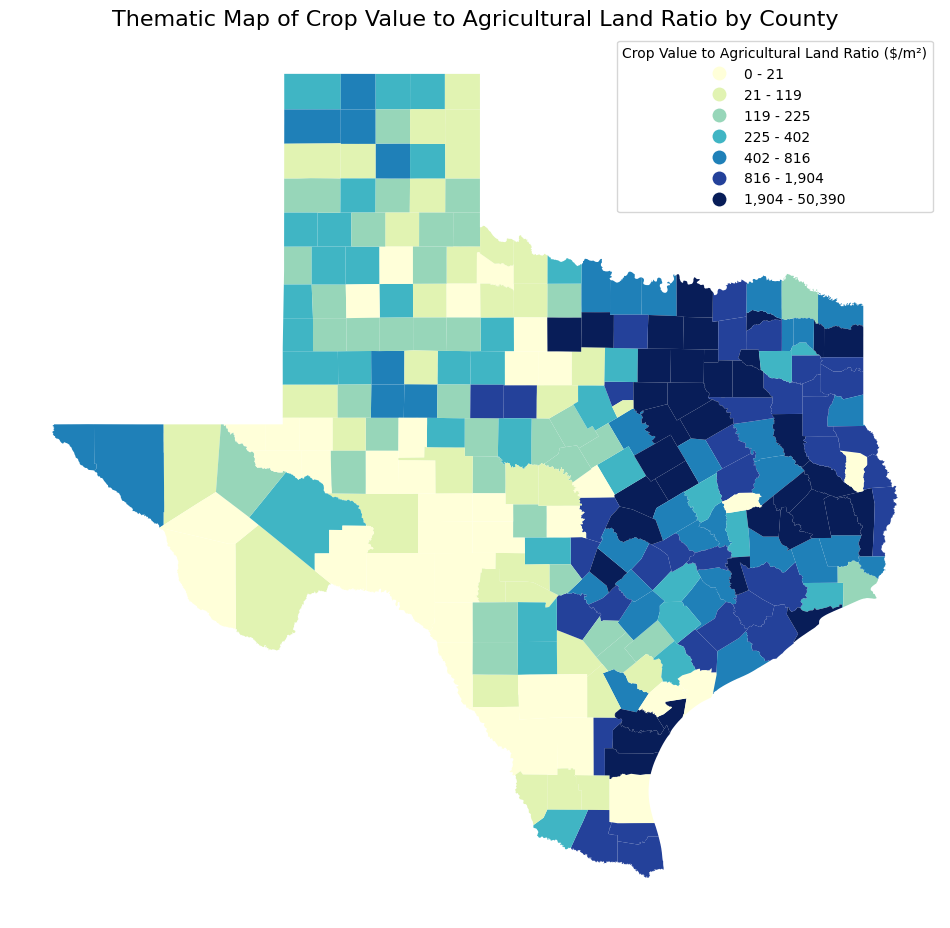

In [114]:
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd

# Ensure merged_df_selected is a GeoDataFrame for plotting
# Assuming 'geometry' column contains the geometry data
merged_gdf_ratio = gpd.GeoDataFrame(merged_df_selected, geometry='geometry')

# Drop rows with NaN in 'value_ratio' before plotting
merged_gdf_ratio_plot = merged_gdf_ratio.dropna(subset=['value_ratio'])

# Define the classification scheme (e.g., Quantiles) and number of classes
k_classes = 7
classifier = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=k_classes)

# Get the bin edges for the legend
bin_edges = classifier.bins
legend_labels = []

# Create legend labels with formatted values
for i in range(len(bin_edges)):
    if i == 0:
        legend_labels.append(f'0 - {bin_edges[i]:,.0f}')
    else:
        legend_labels.append(f'{bin_edges[i-1]:,.0f} - {bin_edges[i]:,.0f}')

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the defined classification
merged_gdf_ratio_plot.plot(column='value_ratio',
                           ax=ax,
                           legend=True,
                           cmap='YlGnBu', # You can change the colormap
                           scheme='Quantiles',
                           classification_kwds={'k': k_classes},
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)'})


ax.set_title('Thematic Map of Crop Value to Agricultural Land Ratio by County', fontsize=16)
ax.set_axis_off()
plt.show()

#annotate

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value to Agricultural Land Ratio by County')

Text(-10875811.90125047, 3176899.1911818213, 'KLEBERG')

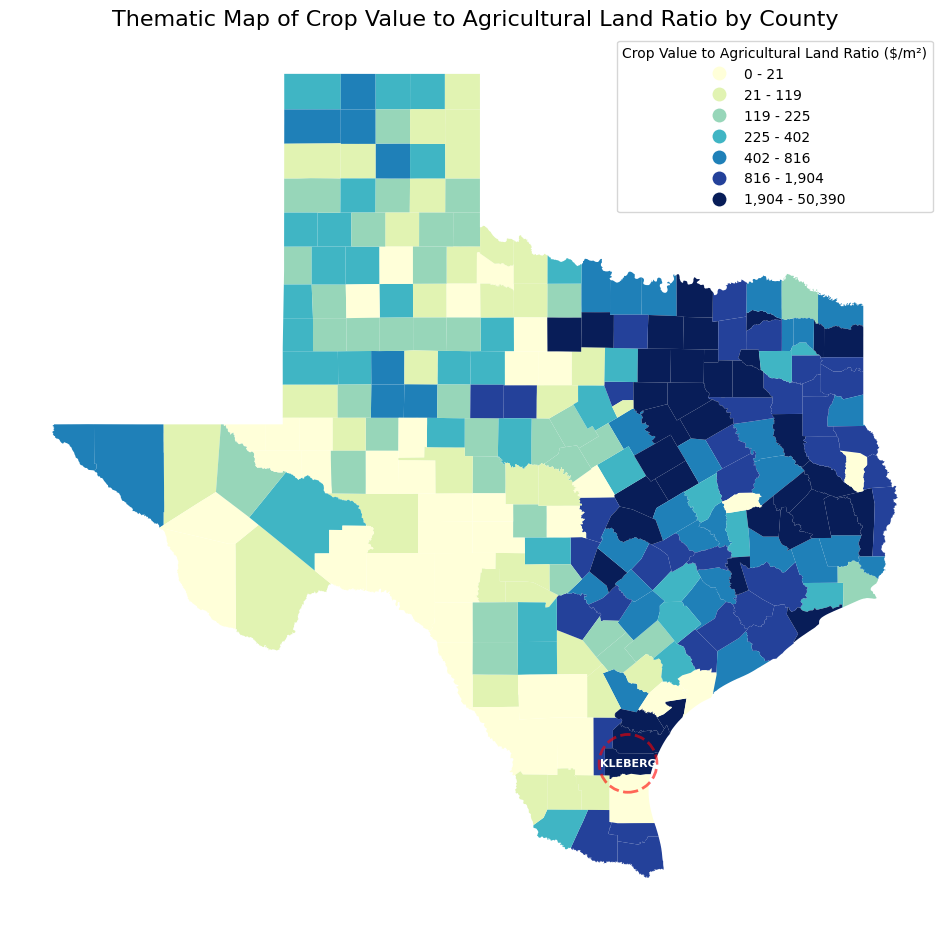

In [124]:
import mapclassify
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # NEW IMPORT
import geopandas as gpd
import pandas as pd # NEW IMPORT

# Ensure merged_df_selected is a GeoDataFrame for plotting
merged_gdf_ratio = gpd.GeoDataFrame(merged_df_selected, geometry='geometry')

# Drop rows with NaN in 'value_ratio' before plotting
merged_gdf_ratio_plot = merged_gdf_ratio.dropna(subset=['value_ratio'])

# Define the classification scheme (e.g., Quantiles) and number of classes
k_classes = 7
classifier = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=k_classes)

# Get the bin edges for the legend
bin_edges = classifier.bins
legend_labels = []

# Create legend labels with formatted values
for i in range(len(bin_edges)):
    if i == 0:
        legend_labels.append(f'0 - {bin_edges[i]:,.0f}')
    else:
        legend_labels.append(f'{bin_edges[i-1]:,.0f} - {bin_edges[i]:,.0f}')

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the defined classification
merged_gdf_ratio_plot.plot(column='value_ratio',
                           ax=ax,
                           legend=True,
                           cmap='YlGnBu', # You can change the colormap
                           scheme='Quantiles',
                           classification_kwds={'k': k_classes},
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)'})


ax.set_title('Thematic Map of Crop Value to Agricultural Land Ratio by County', fontsize=16)
ax.set_axis_off()

# --- NEW ANNOTATION CODE STARTS HERE ---

# 1. Find the row with the maximum 'value_ratio'
max_ratio_row = merged_gdf_ratio_plot.loc[merged_gdf_ratio_plot['value_ratio'].idxmax()]

# 2. Get the county name and geometry centroid
max_county_name = max_ratio_row['County']
centroid = max_ratio_row.geometry.centroid
x_coord = centroid.x
y_coord = centroid.y

# 3. Define the Ellipse (Adjust size as necessary)
ellipse_width = 100000
ellipse_height = 100000

ellipse = mpatches.Ellipse((x_coord, y_coord), ellipse_width, ellipse_height,
                           color='red',
                           alpha=0.6,
                           fill=False,
                           linewidth=2,
                           linestyle='--')

# 4. Add the Ellipse to the plot axes
ax.add_patch(ellipse)

# 5. Add the County Name annotation (text)
ax.annotate(max_county_name,
            xy=(x_coord, y_coord),
            xytext=(x_coord, y_coord),
            textcoords='data',
            ha='center', va='center',
            fontsize=8,
            color='White',
            fontweight='bold')

# --- NEW ANNOTATION CODE ENDS HERE ---

# Show the plot
plt.show()

#Distribution

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='value_ratio', ylabel='Count'>

<Axes: xlabel='value_ratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Value Ratio')

Text(0.5, 0, 'Value Ratio')

Text(0, 0.5, 'Count')

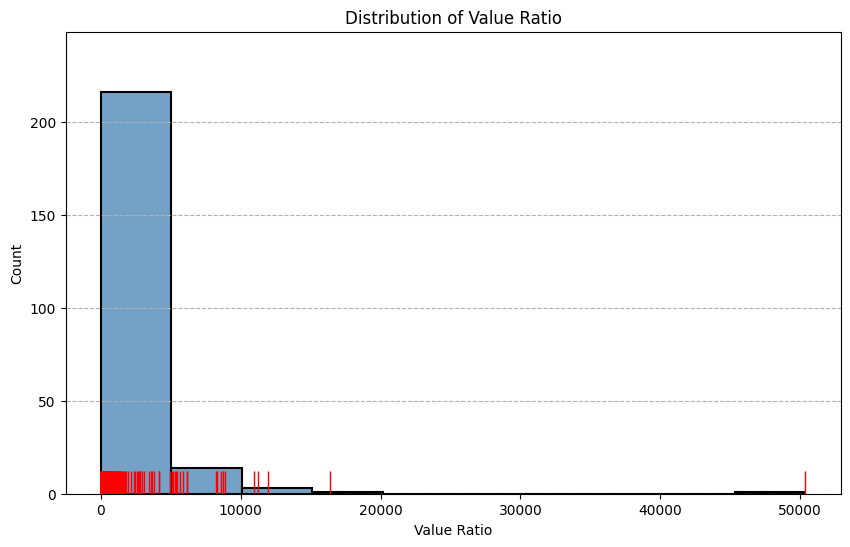

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


sns.histplot(
    data=merged_df_selected,
    x='value_ratio',
    bins=10,  # You can adjust the number of bins
    edgecolor='black',
    color='steelblue',
    linewidth=1.5  # Adjust border thickness
)


sns.rugplot(
    data=merged_df_selected,
    x='value_ratio',
    color='red',
    height=0.05  # Adjust the height of the rug lines
)


plt.title('Distribution of Value Ratio')
plt.xlabel('Value Ratio')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='value_ratio', ylabel='Count'>

<Axes: xlabel='value_ratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Value Ratio (Zoomed)')

Text(0.5, 0, 'Value Ratio')

Text(0, 0.5, 'Count')

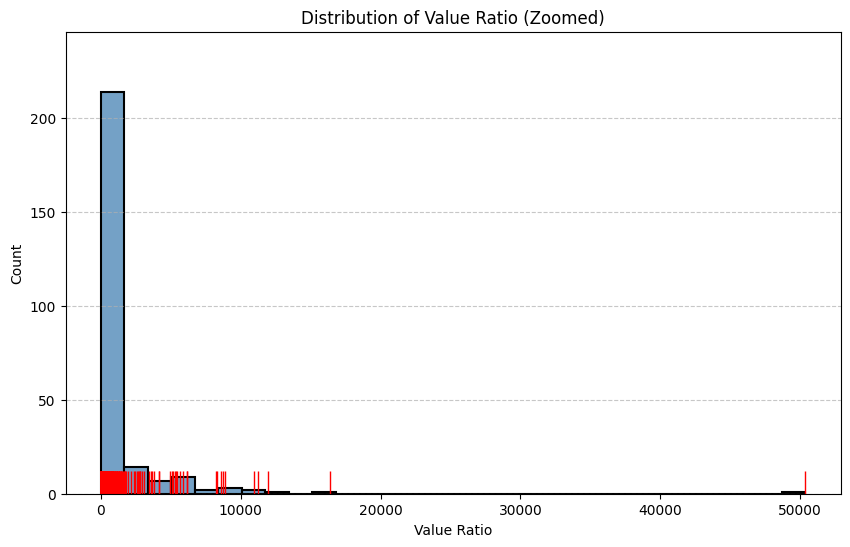

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the 'Value Ratio' column

# 1. Create the figure and axes
plt.figure(figsize=(10, 6))

# 2. Plot the histogram
sns.histplot(
    data=merged_df_selected,
    x='value_ratio',  # Use the correct column name from your data
    bins=30,          # Increased bins for more detail in the focused area
    edgecolor='black',
    color='steelblue',
    linewidth=1.5
)

# 3. Add the rug plot
sns.rugplot(
    data=merged_df_selected,
    x='value_ratio',
    color='red',
    height=0.05
)

# 4. Adjust the X-axis range (the key adjustment)
# This focuses the plot on the main cluster of data, hiding the distant outliers.
# plt.xlim(0, 15000) # You can try 10000, 12000, or 15000

# 5. Set labels and title
plt.title('Distribution of Value Ratio (Zoomed)')
plt.xlabel('Value Ratio')
plt.ylabel('Count')

# 6. Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#I/o

In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 27.1 MB/s eta 0:00:00


In [ ]:
import fiona
# There is a list of available drivers which are unexposed but supported
# (depending on the GDAL-build).
# You can activate these on runtime
# by updating the supported_drivers dictionary like:
# fiona.supported_drivers["NAS"] = "raw"
fiona.supported_drivers['KML'] = 'rw'
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r',
 'KML': 'rw'}

In [ ]:
! wget -q -O Texas_County_Boundaries_4845315375211121464.zip https://raw.githubusercontent.com/Nemipatel210/GIS/6c673d7fa088d4803b52ba23025623d675de0a7f/Texas_County_Boundaries_4845315375211121464.zip
zip_ref = zipfile.ZipFile('Texas_County_Boundaries_4845315375211121464.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
txC0=gpd.read_file('County_Boundaries.shp')

tx_ps2=txC0.copy()
tx_ps2['geometry'] =tx_ps2.simplify(tolerance=2000)

In [ ]:
tx_ps2.to_file('tx_ps2.kml', driver='KML')
!head -25 tx_ps2.kml

<?xml version="1.0" encoding="utf-8" ?>
<kml xmlns="http://www.opengis.net/kml/2.2">
<Document id="root_doc">
<Schema name="tx_ps2" id="tx_ps2">
	<SimpleField name="CMPTRL_CNT" type="string"></SimpleField>
	<SimpleField name="DPS_CNTY_N" type="string"></SimpleField>
	<SimpleField name="FIPS_ST_CN" type="string"></SimpleField>
	<SimpleField name="TXDOT_CNTY" type="string"></SimpleField>
	<SimpleField name="TXDOT_DIST" type="string"></SimpleField>
	<SimpleField name="CNTY_NM" type="string"></SimpleField>
	<SimpleField name="CNTY_NBR" type="string"></SimpleField>
	<SimpleField name="DIST_NBR" type="string"></SimpleField>
	<SimpleField name="GID" type="string"></SimpleField>
</Schema>
<Folder><name>tx_ps2</name>
  <Placemark id="tx_ps2.1">
	<name>232</name>
	<description>232</description>
	<Style><LineStyle><color>ff0000ff</color></LineStyle><PolyStyle><fill>0</fill></PolyStyle></Style>
	<ExtendedData><SchemaData schemaUrl="#tx_ps2">
		<SimpleData name="CMPTRL_CNT">48463</SimpleData>
		<Si

In [ ]:
tx_ps2.to_file('tx_ps2.geojson', driver='GeoJSON')
!head -10 tx_ps2.geojson #coords in weird format

{
"type": "FeatureCollection",
"name": "tx_ps2",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
"features": [
{ "type": "Feature", "properties": { "CMPTRL_CNT": 232, "DPS_CNTY_N": 232, "FIPS_ST_CN": "48463", "TXDOT_CNTY": 232, "TXDOT_DIST": 15, "CNTY_NM": "Uvalde", "CNTY_NBR": 232, "DIST_NBR": 15, "GID": 35 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -11066702.791484007611871, 3386786.60495517263189 ], [ -11144318.695638787001371, 3386628.938485484570265 ], [ -11144422.22554762288928, 3455237.181263697799295 ], [ -11066469.619543448090553, 3455833.946342251263559 ], [ -11066702.791484007611871, 3386786.60495517263189 ] ] ] } },
{ "type": "Feature", "properties": { "CMPTRL_CNT": 143, "DPS_CNTY_N": 143, "FIPS_ST_CN": "48285", "TXDOT_CNTY": 143, "TXDOT_DIST": 13, "CNTY_NM": "Lavaca", "CNTY_NBR": 143, "DIST_NBR": 13, "GID": 36 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -10783021.183252930641174, 3456095.209583691321313 ], [ -10

<Axes: >

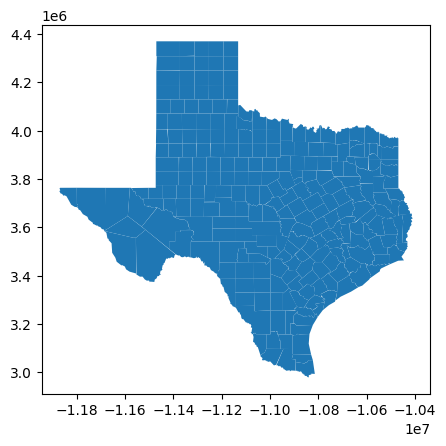

In [ ]:
a=gpd.read_file('tx_ps2.geojson')
a.plot() #works fine in gpd

In [ ]:
with open('test.geojson', 'w') as f:
    f.write(tx_ps2.to_json(to_wgs84=True))
!head test.geojson #proper coordinates now :)

191216

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"CMPTRL_CNT": 232, "DPS_CNTY_N": 232, "FIPS_ST_CN": "48463", "TXDOT_CNTY": 232, "TXDOT_DIST": 15, "CNTY_NM": "Uvalde", "CNTY_NBR": 232, "DIST_NBR": 15, "GID": 35}, "geometry": {"type": "Polygon", "coordinates": [[[-99.41388262398257, 29.087492620246454], [-100.11111815391251, 29.08625490217997], [-100.11204817890722, 29.62343500851945], [-99.41178800480223, 29.62809503347345], [-99.41388262398257, 29.087492620246454]]]}}, {"id": "1", "type": "Feature", "properties": {"CMPTRL_CNT": 143, "DPS_CNTY_N": 143, "FIPS_ST_CN": "48285", "TXDOT_CNTY": 143, "TXDOT_DIST": 13, "CNTY_NM": "Lavaca", "CNTY_NBR": 143, "DIST_NBR": 13, "GID": 36}, "geometry": {"type": "Polygon", "coordinates": [[[-96.86552737900675, 29.630135120578124], [-96.56054728920266, 29.335425072878717], [-96.93872737198235, 29.06316500210082], [-97.24010745759347, 29.384545058527337], [-97.20493745845668, 29.57987510114934], [-97.1433274476479

In [ ]:
import folium as f
map = f.Map()
f.GeoJson('test.geojson').add_to(map)
map

#Data2017

In [ ]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/ceb9b04b094f01fee0c9839bfdd89443b61a053c/crop_total_2017.csv'
crop_total_2017_df = pd.read_csv(url)
display(crop_total_2017_df.head(5))

Program  Year Period  Week Ending Geo Level  State  State ANSI Ag District  \
0  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
1  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
2  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
3  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
4  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   

   Ag District Code   County  ...  Zip Code  Region  watershed_code  \
0                40     BELL  ...       NaN     NaN               0   
1                40   BOSQUE  ...       NaN     NaN               0   
2                40   COLLIN  ...       NaN     NaN               0   
3                40    COOKE  ...       NaN     NaN               0   
4                40  CORYELL  ...       NaN     NaN               0   

   Watershed    Commodity                           Data Item Domain  \
0        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
1        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
2        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
3        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   
4        NaN  CROP TOTALS  CROP TOTALS - SALES, MEASURED IN $  TOTAL   

  Domain Category       Value CV (%)  
0   NOT SPECIFIED  38,084,000   19.2  
1   NOT SPECIFIED   6,950,000   19.2  
2   NOT SPECIFIED  29,538,000   19.2  
3   NOT SPECIFIED  12,791,000   19.2  
4   NOT SPECIFIED   8,180,000   19.2  

[5 rows x 21 columns]

In [ ]:
crop_total_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           253 non-null    object 
 1   Year              253 non-null    int64  
 2   Period            253 non-null    object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         253 non-null    object 
 5   State             253 non-null    object 
 6   State ANSI        253 non-null    int64  
 7   Ag District       253 non-null    object 
 8   Ag District Code  253 non-null    int64  
 9   County            253 non-null    object 
 10  County ANSI       253 non-null    int64  
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    253 non-null    int64  
 14  Watershed         0 non-null      float64
 15  Commodity         253 non-null    object 
 16  Data Item         253 non-null    object 
 1

In [ ]:
tx_crop2017 = tx.merge(crop2022_df, left_on='CNTY_NM', right_on='County', how='outer',indicator=True)
tx_crop2017_plot = tx_crop2017[['CNTY_NM', 'geometry', 'Value']]

tx_crop2017_plot.head(10)

CNTY_NM                                           geometry       Value
0   ANDERSON  POLYGON ((-10622770.07 3774372.952, -10622743....  24,811,000
1    ANDREWS  POLYGON ((-11452352.064 3832169.96, -11452055....   5,343,000
2   ANGELINA  POLYGON ((-10560243.006 3701241.912, -10560220...   6,298,000
3    ARANSAS  POLYGON ((-10775558.316 3283921.376, -10776779...     688,000
4     ARCHER  POLYGON ((-10956443.534 3973368.927, -10956442...   8,344,000
5  ARMSTRONG  POLYGON ((-11313190.44 4139324.091, -11313143....  16,849,000
6   ATASCOSA  POLYGON ((-10928523.582 3341610.75, -10936457....  16,004,000
7     AUSTIN  POLYGON ((-10702848.867 3512350.878, -10702888...  19,506,000
8     BAILEY  POLYGON ((-11423114.003 4006331.061, -11423107...  39,401,000
9    BANDERA  POLYGON ((-11075692.444 3491572.27, -11073026....     777,000

In [ ]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/374c134d3da8b2821e1b62761d465fc905bacf7f/agri_land_2017.csv'
area_2017_df = pd.read_csv(url)
display(area_2017_df.head(5))

Program  Year Period  Week Ending Geo Level  State  State ANSI Ag District  \
0  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
1  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
2  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
3  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
4  CENSUS  2017   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   

   Ag District Code   County  ...  Zip Code  Region  watershed_code  \
0                40     BELL  ...       NaN     NaN               0   
1                40   BOSQUE  ...       NaN     NaN               0   
2                40   COLLIN  ...       NaN     NaN               0   
3                40    COOKE  ...       NaN     NaN               0   
4                40  CORYELL  ...       NaN     NaN               0   

   Watershed  Commodity        Data Item             Domain  \
0        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
1        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
2        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
3        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   
4        NaN    AG LAND  AG LAND - ACRES  IRRIGATION STATUS   

                         Domain Category   Value CV (%)  
0  IRRIGATION STATUS: (ANY ON OPERATION)  10,983   19.0  
1  IRRIGATION STATUS: (ANY ON OPERATION)  65,236   19.0  
2  IRRIGATION STATUS: (ANY ON OPERATION)   4,595   19.0  
3  IRRIGATION STATUS: (ANY ON OPERATION)  14,070   19.0  
4  IRRIGATION STATUS: (ANY ON OPERATION)   5,380   19.0  

[5 rows x 21 columns]

In [ ]:
merged_df_2017 = area_2017_df.merge(tx_crop2017_plot, left_on='County', right_on='CNTY_NM', how='outer', indicator=True)
display(merged_df.head())

Program    Year Period  Week Ending Geo Level  State  State ANSI  \
0  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
1  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
2  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
3  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   
4  CENSUS  2022.0   YEAR          NaN    COUNTY  TEXAS        48.0   

            Ag District  Ag District Code    County  ...  Commodity  \
0      EAST TEXAS NORTH              51.0  ANDERSON  ...    AG LAND   
1  SOUTHERN HIGH PLAINS              12.0   ANDREWS  ...    AG LAND   
2      EAST TEXAS SOUTH              52.0  ANGELINA  ...    AG LAND   
3          COASTAL BEND              82.0   ARANSAS  ...    AG LAND   
4         CROSS TIMBERS              30.0    ARCHER  ...    AG LAND   

         Data Item             Domain                        Domain Category  \
0  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
1  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
2  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
3  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   
4  AG LAND - ACRES  IRRIGATION STATUS  IRRIGATION STATUS: (ANY ON OPERATION)   

   Value_x CV (%)   CNTY_NM  \
0   32,469   22.9  ANDERSON   
1  156,497   22.9   ANDREWS   
2    1,722   22.9  ANGELINA   
3       63   22.9   ARANSAS   
4   46,951   22.9    ARCHER   

                                            geometry     Value_y _merge  
0  POLYGON ((-10622770.07 3774372.952, -10622743....  24811000.0   both  
1  POLYGON ((-11452352.064 3832169.96, -11452055....   5343000.0   both  
2  POLYGON ((-10560243.006 3701241.912, -10560220...   6298000.0   both  
3  POLYGON ((-10775558.316 3283921.376, -10776779...    688000.0   both  
4  POLYGON ((-10956443.534 3973368.927, -10956442...   8344000.0   both  

[5 rows x 25 columns]

In [ ]:
merged_df_selected_2017 = merged_df_2017[['County', 'Value_x', 'Value_y', 'geometry']]
merged_df_selected_2017.head()

County Value_x     Value_y  \
0  ANDERSON  32,795  24,811,000   
1   ANDREWS  32,830   5,343,000   
2  ANGELINA   1,966   6,298,000   
3   ARANSAS     (D)     688,000   
4    ARCHER   1,493   8,344,000   

                                            geometry  
0  POLYGON ((-10622770.07 3774372.952, -10622743....  
1  POLYGON ((-11452352.064 3832169.96, -11452055....  
2  POLYGON ((-10560243.006 3701241.912, -10560220...  
3  POLYGON ((-10775558.316 3283921.376, -10776779...  
4  POLYGON ((-10956443.534 3973368.927, -10956442...

In [ ]:
merged_df_selected_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   County    254 non-null    object  
 1   Value_x   254 non-null    object  
 2   Value_y   254 non-null    object  
 3   geometry  254 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 8.1+ KB


In [ ]:
merged_df_selected_2017['Value_x'] = pd.to_numeric(merged_df_selected_2017['Value_x'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False), errors='coerce')
merged_df_selected_2017['Value_y'] = pd.to_numeric(merged_df_selected_2017['Value_y'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False), errors='coerce')

merged_df_selected_2017['value_ratio'] = merged_df_selected_2017['Value_y'] / merged_df_selected_2017['Value_x']
merged_df_selected_2017['value_ratio'] = merged_df_selected_2017['value_ratio'].fillna(0) # Fill NaN values with 0

display(merged_df_selected_2017.head())

/tmp/ipython-input-3896940716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected_2017['Value_x'] = pd.to_numeric(merged_df_selected_2017['Value_x'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False), errors='coerce')
/tmp/ipython-input-3896940716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_selected_2017['Value_y'] = pd.to_numeric(merged_df_selected_2017['Value_y'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex

County  Value_x     Value_y  \
0  ANDERSON  32795.0  24811000.0   
1   ANDREWS  32830.0   5343000.0   
2  ANGELINA   1966.0   6298000.0   
3   ARANSAS      NaN    688000.0   
4    ARCHER   1493.0   8344000.0   

                                            geometry  value_ratio  
0  POLYGON ((-10622770.07 3774372.952, -10622743....   756.548254  
1  POLYGON ((-11452352.064 3832169.96, -11452055....   162.747487  
2  POLYGON ((-10560243.006 3701241.912, -10560220...  3203.458800  
3  POLYGON ((-10775558.316 3283921.376, -10776779...     0.000000  
4  POLYGON ((-10956443.534 3973368.927, -10956442...  5588.747488

In [ ]:
classifier_2022 = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=7)
bin_edges_2022 = classifier_2022.bins

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value to Agricultural Land Ratio by County in 2017')

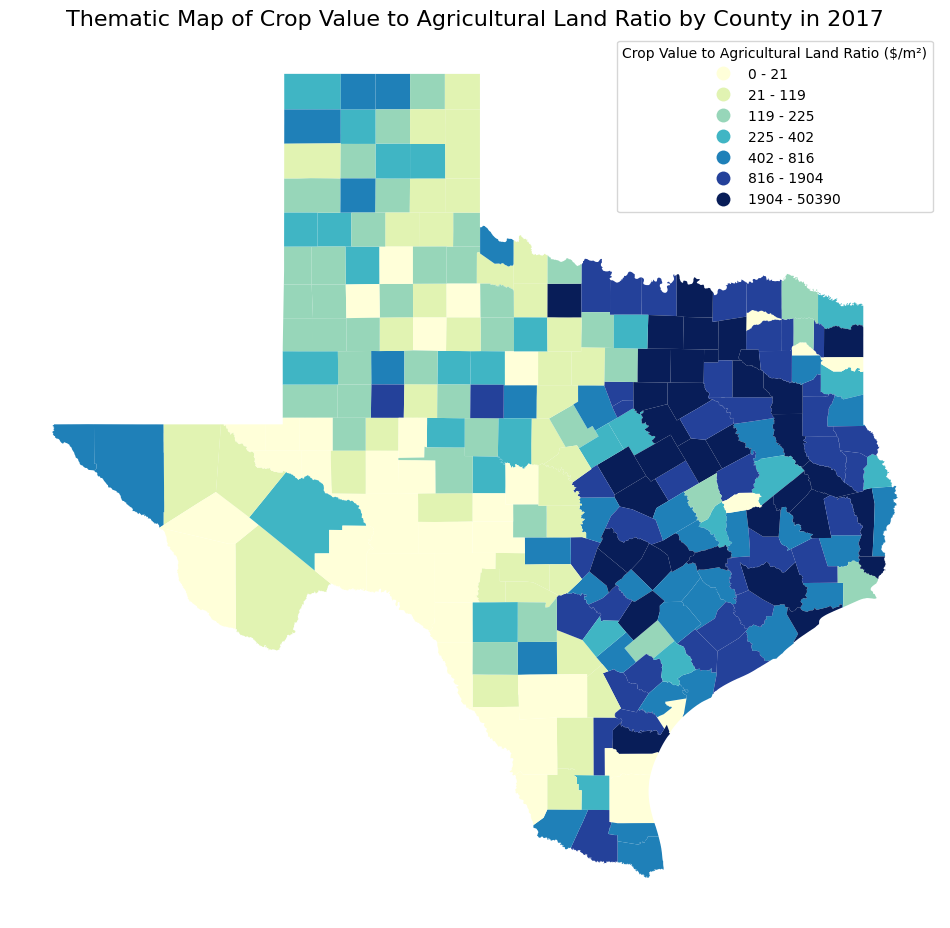

In [ ]:
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd

merged_gdf_ratio_2017 = gpd.GeoDataFrame(merged_df_selected_2017, geometry='geometry')

# Drop rows with NaN in 'value_ratio' before plotting
merged_gdf_ratio_plot_2017 = merged_gdf_ratio_2017.dropna(subset=['value_ratio'])

# --- Key Change: Use UserDefined Classifier with 2022 Bins ---
# This ensures the 2017 plot uses the *exact same* breaks as 2022.
# Use the stored bin edges from the 2022 classification
classifier_2017_fixed = mapclassify.UserDefined(merged_gdf_ratio_plot_2017['value_ratio'], bins=bin_edges_2022)

# Get the fixed bin edges for the legend labels
bin_edges = classifier_2017_fixed.bins
legend_labels = []

# Create legend labels with formatted values using the 2022 bins
for i in range(len(bin_edges)):
    if i == 0:
        # Assuming the lowest bound is 0, which works well for ratio data
        legend_labels.append(f'0 - {bin_edges[i]:.0f}')
    else:
        # Use the stored bin edges from 2022
        legend_labels.append(f'{bin_edges[i-1]:.0f} - {bin_edges[i]:.0f}')

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the fixed classification scheme
merged_gdf_ratio_plot_2017.plot(column='value_ratio',
                           ax=ax,
                           legend=True,
                           cmap='YlGnBu',
                           # Change scheme to 'UserDefined' and provide the 2022 bins
                           scheme='UserDefined',
                           classification_kwds={'bins': bin_edges_2022}, # Use 2022 bins here
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)'})


ax.set_title('Thematic Map of Crop Value to Agricultural Land Ratio by County in 2017', fontsize=16)
ax.set_axis_off()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Crop Value/Land Ratio by County in 2017')

<Axes: >

Text(0.5, 1.0, 'Crop Value/Land Ratio by County in 2022')

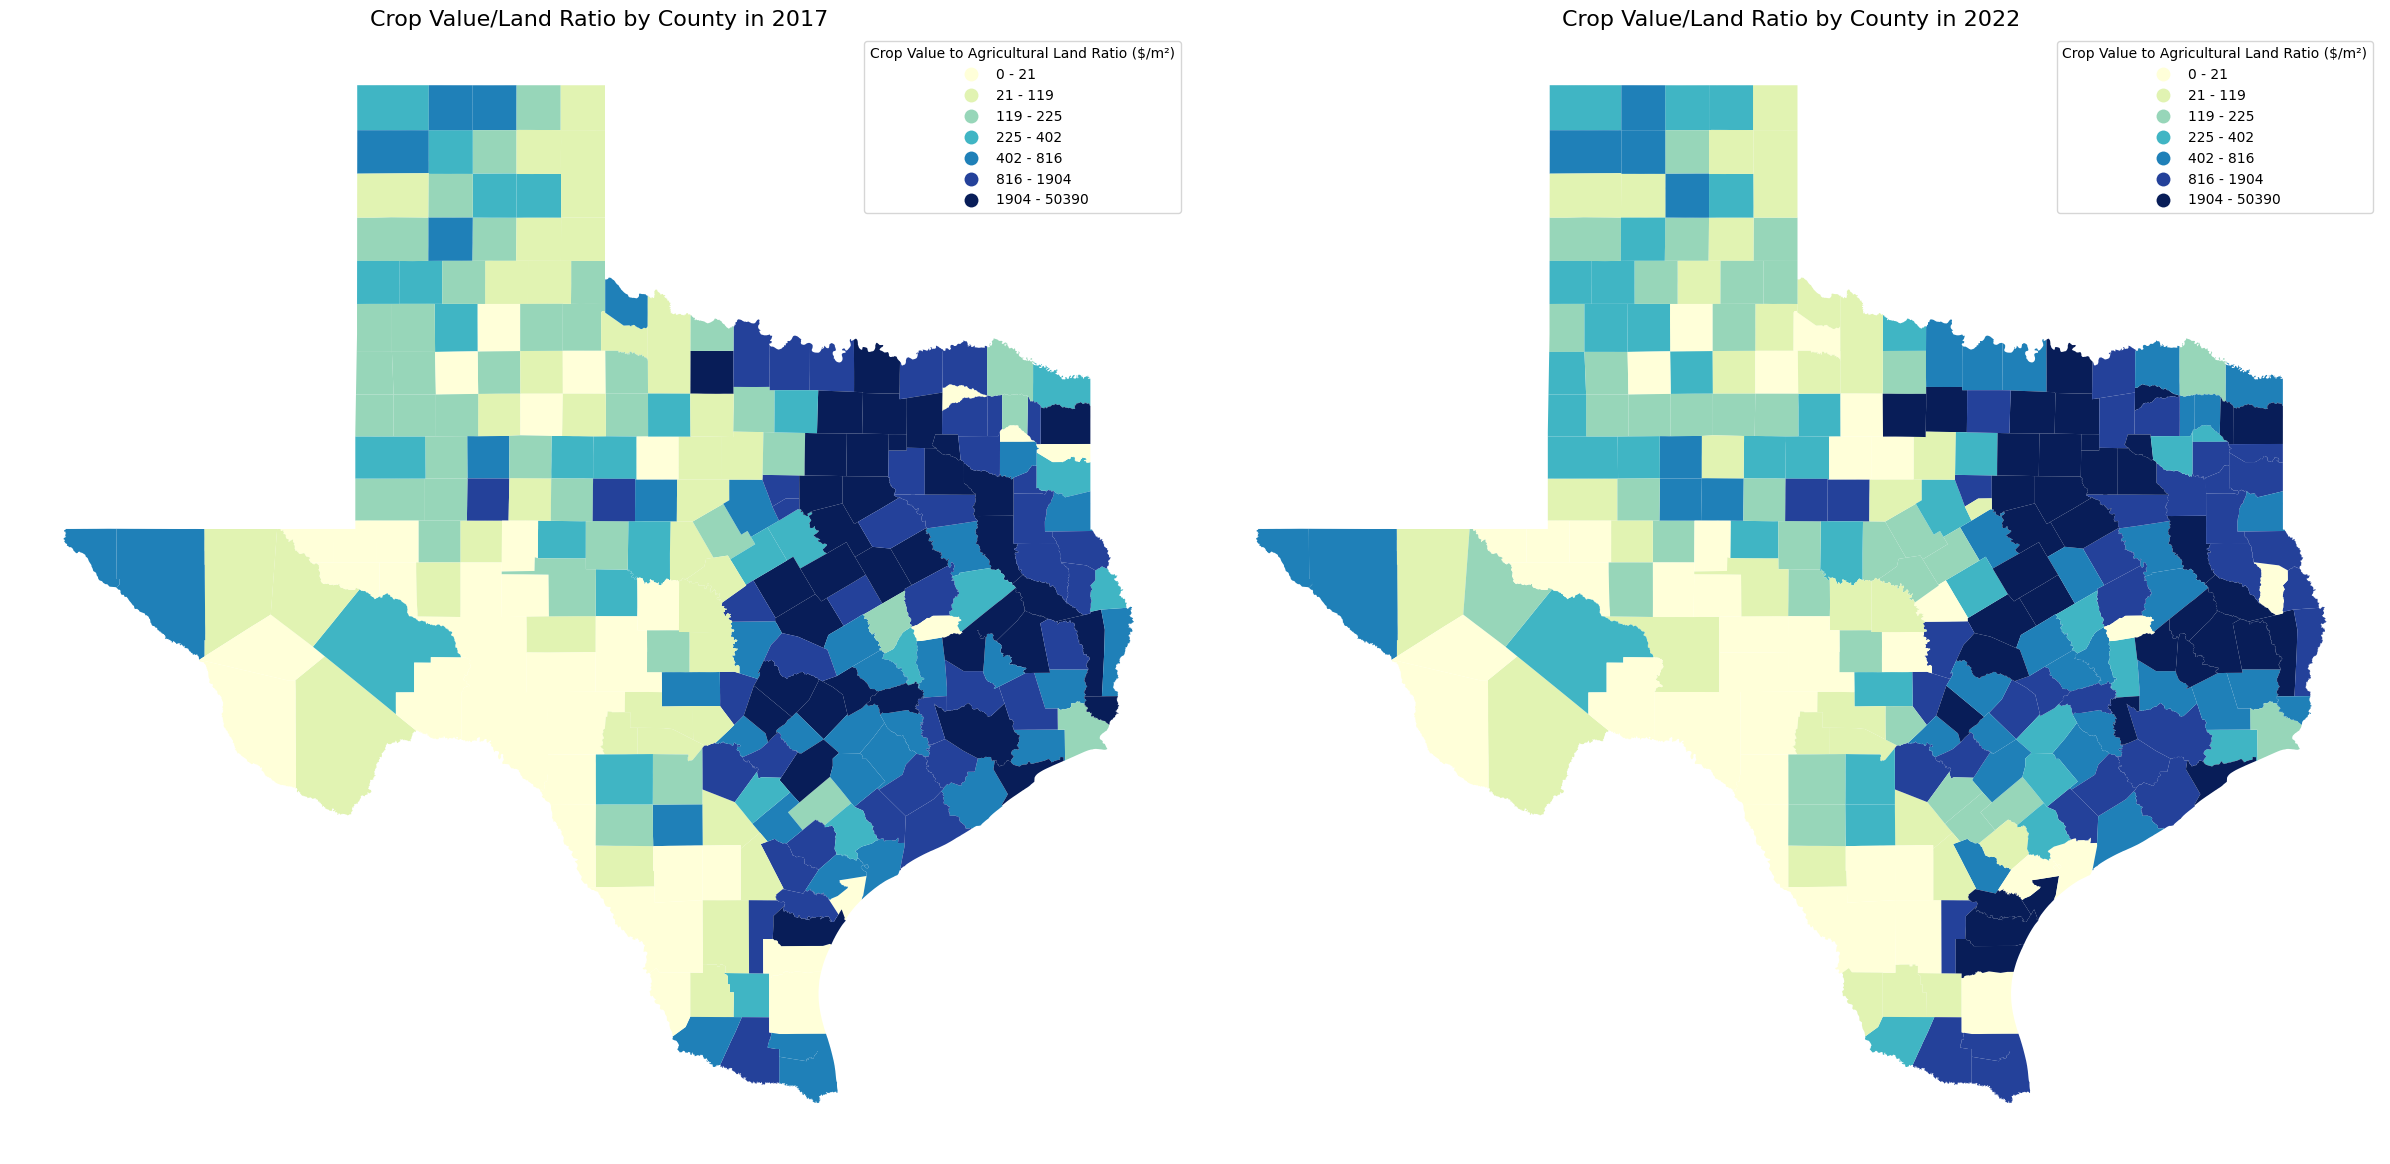

In [ ]:
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd


# --- Prepare 2017 Data ---
merged_gdf_ratio_2017 = gpd.GeoDataFrame(merged_df_selected_2017, geometry='geometry')
merged_gdf_ratio_plot_2017 = merged_gdf_ratio_2017.dropna(subset=['value_ratio'])

# --- Prepare 2022 Data ---
merged_gdf_ratio = gpd.GeoDataFrame(merged_df_selected, geometry='geometry')
merged_gdf_ratio_plot = merged_gdf_ratio.dropna(subset=['value_ratio'])

# --- 2022 Classification (Quantiles) ---
k_classes = 7
classifier_2022 = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=k_classes)
bin_edges_2022 = classifier_2022.bins # Get the bins for the 2017 plot

# --- Common Legend Label Generation ---

# For 2017 (using fixed 2022 bins)
legend_labels_2017 = []
for i in range(len(bin_edges_2022)):
    if i == 0:
        legend_labels_2017.append(f'0 - {bin_edges_2022[i]:.0f}')
    else:
        legend_labels_2017.append(f'{bin_edges_2022[i-1]:.0f} - {bin_edges_2022[i]:.0f}')

# For 2022 (using Quantile bins)
legend_labels_2022 = []
for i in range(len(bin_edges_2022)): # Use the same bin_edges_2022 for consistency
    if i == 0:
        legend_labels_2022.append(f'0 - {bin_edges_2022[i]:.0f}')
    else:
        legend_labels_2022.append(f'{bin_edges_2022[i-1]:.0f} - {bin_edges_2022[i]:.0f}')

# --- Create Side-by-Side Figure ---
fig, axes = plt.subplots(1, 2, figsize=(24, 12)) # 1 row, 2 columns

# --- Plot 1: 2017 Map (Fixed Bins from 2022) ---
ax1 = axes[0]
merged_gdf_ratio_plot_2017.plot(column='value_ratio',
                           ax=ax1,
                           legend=True,
                           cmap='YlGnBu',
                           scheme='UserDefined',
                           classification_kwds={'bins': bin_edges_2022}, # Use 2022 bins
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels_2017,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)'})

ax1.set_title('Crop Value/Land Ratio by County in 2017', fontsize=16)
ax1.set_axis_off()

# --- Plot 2: 2022 Map (Quantile Classification) ---
ax2 = axes[1]
merged_gdf_ratio_plot.plot(column='value_ratio',
                           ax=ax2,
                           legend=True,
                           cmap='YlGnBu',
                           scheme='Quantiles',
                           classification_kwds={'k': k_classes}, # Use Quantile classification
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels_2022,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)'})

ax2.set_title('Crop Value/Land Ratio by County in 2022', fontsize=16)
ax2.set_axis_off()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Merge the two datasets on a common identifier (adjust 'county_id' as needed)
merged_change = merged_gdf_ratio_plot.merge(
    merged_gdf_ratio_plot_2017[['County', 'value_ratio']],  # 2017 values
    on='County',
    suffixes=('_2022', '_2017')
)

# Compute the difference
merged_change['value_diff'] = merged_change['value_ratio_2022'] - merged_change['value_ratio_2017']


In [ ]:
threshold = 5  # adjust based on scale
merged_change['change_category'] = merged_change['value_diff'].apply(
    lambda x: 'Positive' if x > threshold else ('Negative' if x < -threshold else 'Neutral')
)


<Axes: >

Text(0.5, 1.0, 'Change in Crop Value/Land Ratio by County (2022 − 2017)')

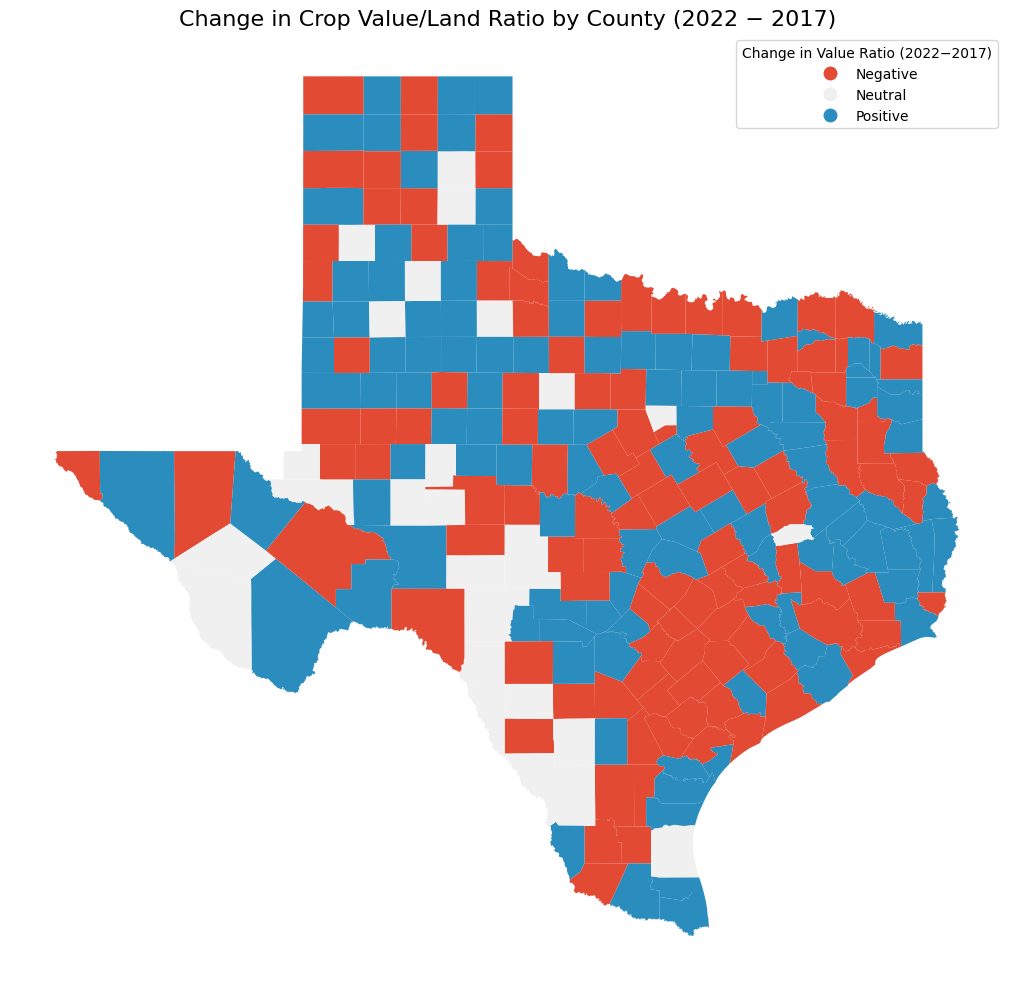

In [ ]:
import matplotlib.colors as mcolors

color_map = {'Negative': '#e34a33',   # warm red-orange
             'Neutral':  '#f0f0f0',   # light gray
             'Positive': '#2b8cbe'}

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_change.plot(column='change_category',
                   ax=ax,
                   legend=True,
                   cmap=mcolors.ListedColormap([color_map[c] for c in ['Negative', 'Neutral', 'Positive']]),
                   categories=['Negative', 'Neutral', 'Positive'],
                   legend_kwds={'title': 'Change in Value Ratio (2022−2017)'})
ax.set_title('Change in Crop Value/Land Ratio by County (2022 − 2017)', fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# Make a copy with centroid geometry
merged_change_centroids = merged_change.copy()
merged_change_centroids['geometry'] = merged_change_centroids.geometry.centroid


In [ ]:
print(merged_change_centroids.geometry.geom_type.value_counts())


Point    253
Name: count, dtype: int64


#Difference in 2022 and 2017 crop value ratio

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Centroid Map: Change in Crop Value/Land Ratio (2022 − 2017)')

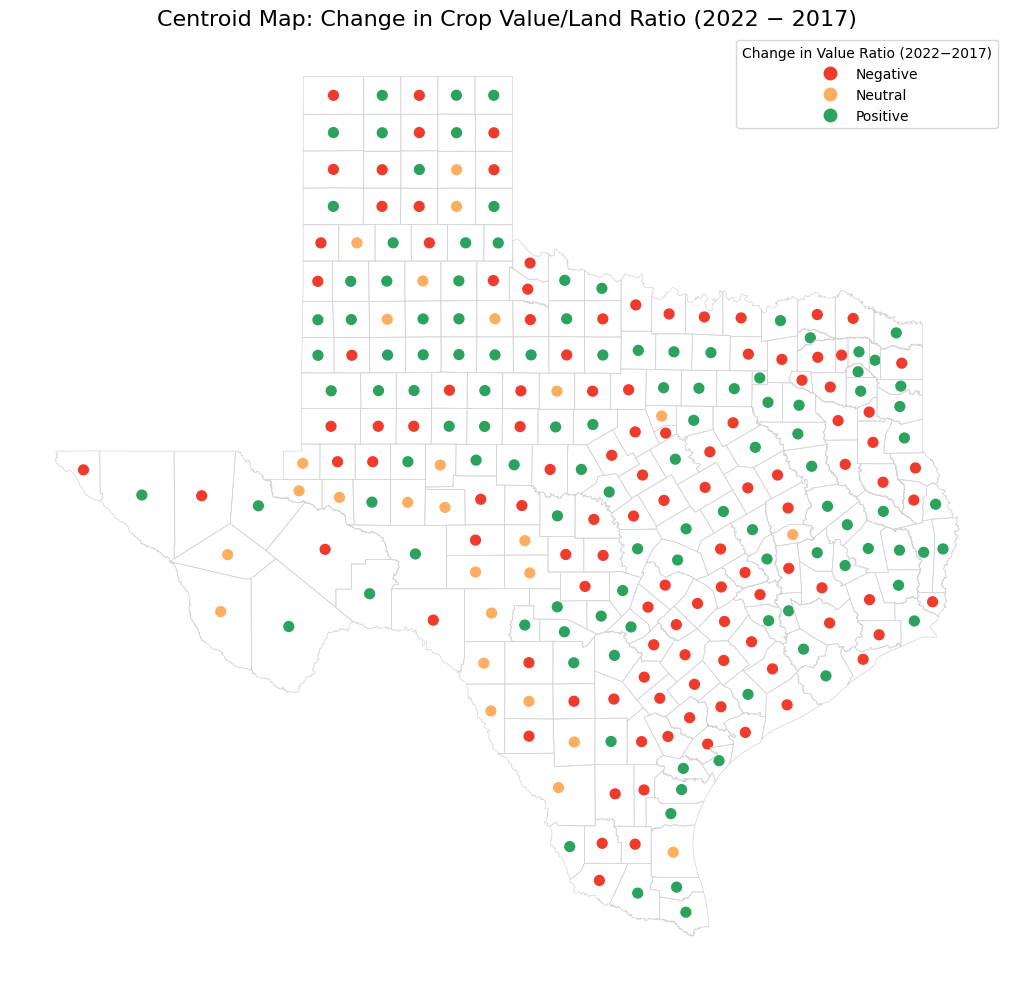

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged_change_centroids.plot(
    column='change_category',
    ax=ax,
    legend=True,
    markersize=50,  # ⬅️ increased point size
    cmap = mcolors.ListedColormap(['#ef3b2c', '#fdae61', '#2ca25f']),
    legend_kwds={'title': 'Change in Value Ratio (2022−2017)'}
)

merged_change.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

ax.set_title('Centroid Map: Change in Crop Value/Land Ratio (2022 − 2017)', fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()


##Adding markers in map

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Centroid Map: Change in Crop Value/Land Ratio (2022 − 2017)')

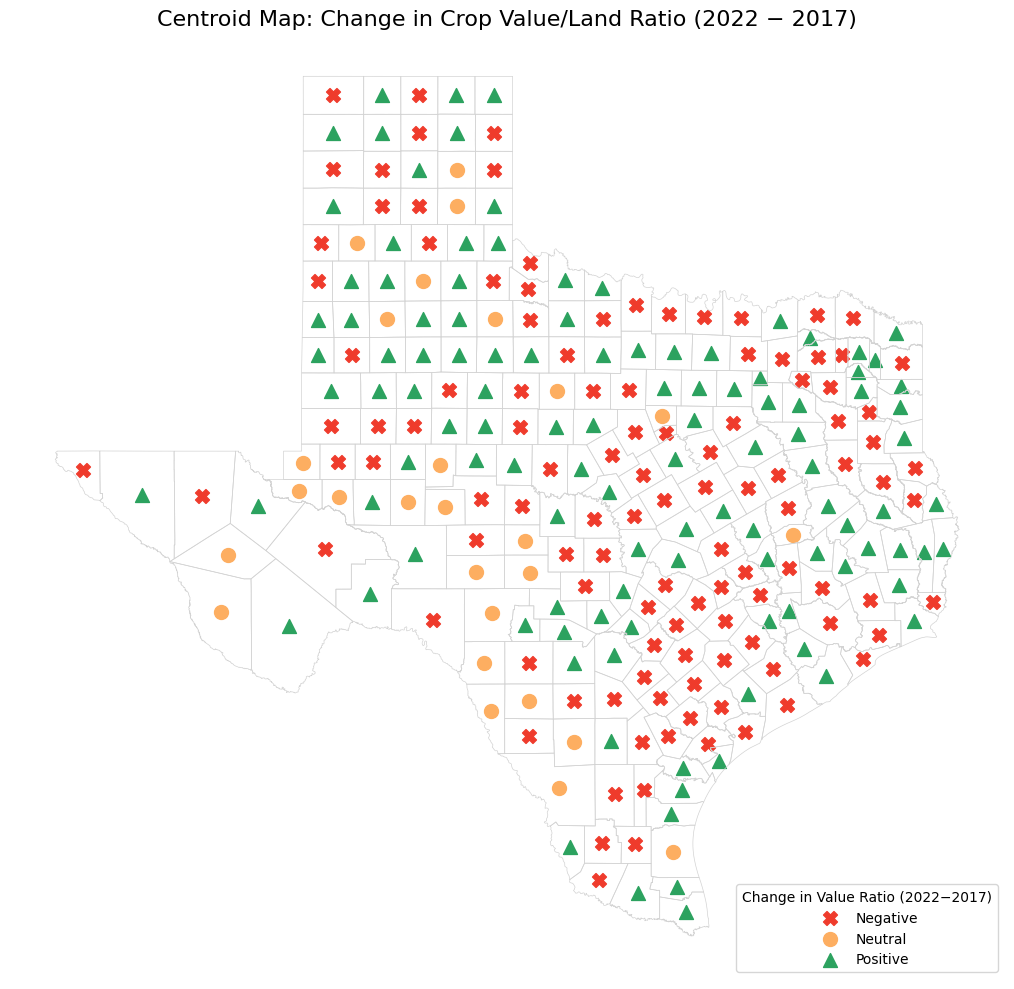

In [126]:
import matplotlib.pyplot as plt

categories = {
    # Red in original cmap: '#ef3b2c'
    'Negative': {'marker': 'X', 'color': '#ef3b2c'}, # Using 'X' as marker
    # Orange in original cmap: '#fdae61'
    'Neutral': {'marker': 'o', 'color': '#fdae61'}, # Using 'o' as marker
    # Green in original cmap: '#2ca25f'
    'Positive': {'marker': '^', 'color': '#2ca25f'}, # Using '^' as marker
}

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Iterate and plot each category separately to use a unique marker
for category, attrs in categories.items():
    # Filter the GeoDataFrame for the current category
    subset = merged_change_centroids[merged_change_centroids['change_category'] == category]

    # Use the plot method for the subset with the custom marker
    subset.plot(
        ax=ax,
        marker=attrs['marker'],
        color=attrs['color'],     # Color is often ignored by the emoji glyph, but kept for consistency
        markersize=100,          # Adjusted size for standard markers
        label=category,           # Use 'category' for the legend entry
    )

# The original code for the boundaries
merged_change.boundary.plot(ax=ax, color='lightgray', linewidth=0.5)

ax.set_title('Centroid Map: Change in Crop Value/Land Ratio (2022 − 2017)', fontsize=16)

# Create the legend from the plotted elements
ax.legend(
    title='Change in Value Ratio (2022−2017)',
    loc='lower right',
    frameon=True,
    markerscale=1 # Restore markerscale
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

# Overlay maps

In [ ]:
! wget -q -O  major_aquifers.zip https://github.com/Nemipatel210/GIS/raw/cc6822b8b6ef210cd2f80068cfac2233270ab5a6/major_aquifers.zip

In [ ]:
zip_ref = zipfile.ZipFile('major_aquifers.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
task1=gpd.read_file('NEW_major_aquifers_dd.shp')

In [ ]:
task1.head(5)

AREA  PERIMETER  AQUIFER  AQ_NAME  \
0  0.075117   3.893477        1  SEYMOUR   
1  0.000541   0.141894        0  SEYMOUR   
2  0.000555   0.129224        0  SEYMOUR   
3  0.000843   0.172150        0  SEYMOUR   
4  0.034188   2.543279        1  SEYMOUR   

                                            geometry  
0  POLYGON ((-100.34871 35.00166, -100.35033 34.9...  
1  POLYGON ((-100.04694 34.78674, -100.04631 34.7...  
2  POLYGON ((-100.15418 34.78239, -100.15341 34.7...  
3  POLYGON ((-100.2075 34.77535, -100.20682 34.77...  
4  POLYGON ((-100.78374 34.6883, -100.78284 34.68...

/tmp/ipython-input-4072524178.py:26: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  task1.plot(


<Axes: >

Text(0.5, 1.0, 'Major Aquifers of Texas')

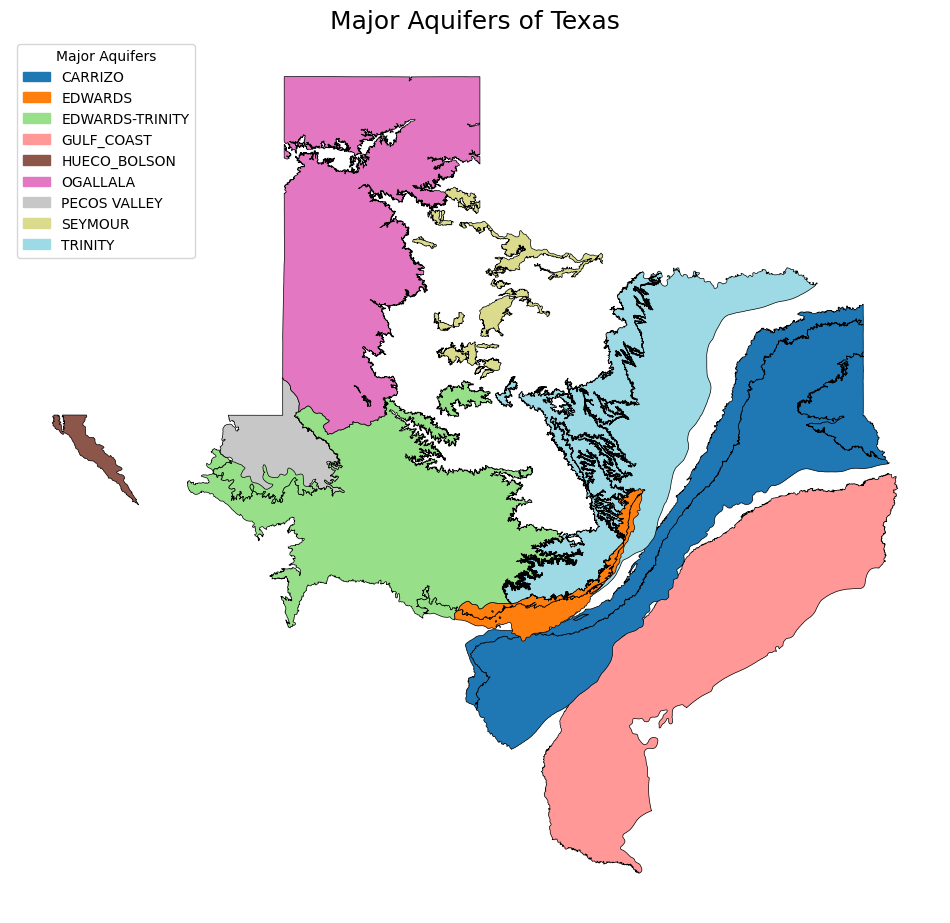

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches # Import mpatches for custom legend

# Assuming 'last1' is your GeoDataFrame containing aquifer data

# Get unique aquifer names and sort them for consistent legend order
aquifer_names = sorted(task1['AQ_NAME'].unique())

# Create a color map with a unique color for each aquifer name
# Using a distinct colormap like 'tab20' or 'tab20b' for categorical data
# Using matplotlib.colormaps is the recommended way
cmap = plt.colormaps['tab20'].resampled(len(aquifer_names)) # Use plt.colormaps
# Access colors from the colormap object correctly
colors = [mcolors.rgb2hex(cmap.colors[i]) for i in range(len(aquifer_names))]

# Create a dictionary to map aquifer names to colors
color_map = dict(zip(aquifer_names, colors))

# --- Generate the Thematic Map ---

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame using the 'AQ_NAME' column and the custom color map
task1.plot(
    column='AQ_NAME',      # The column to use for coloring
    ax=ax,
    # legend=True, # Remove default legend creation
    categorical=True,      # Indicate that the data is categorical
    color=task1['AQ_NAME'].map(color_map), # Map aquifer names to colors
    edgecolor='black',     # Add a thin black edge to polygons
    linewidth=0.5,
    # legend_kwds are ignored when legend=False or removed
    # legend_kwds={
    #     'loc': 'upper left', # Adjust legend location as needed
    #     'title': 'Major Aquifers',
    #     'frameon': True
    # }
)

# --- Add a Custom Legend Manually ---

# Create a list of legend patches using the aquifer names and their assigned colors
patches = [mpatches.Patch(color=color_map[name], label=name) for name in aquifer_names]

# Add the legend to the axes
ax.legend(
    handles=patches,
    title='Major Aquifers',
    loc='upper left', # Adjust legend location as needed
    frameon=True,
    fontsize=10 # Adjust font size as needed
)


# Customize the map appearance
ax.set_title('Major Aquifers of Texas', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.show()

## Major Aquifers of Texas with County Boundaries Overlay

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Major Aquifers of Texas with County Boundaries Overlay')

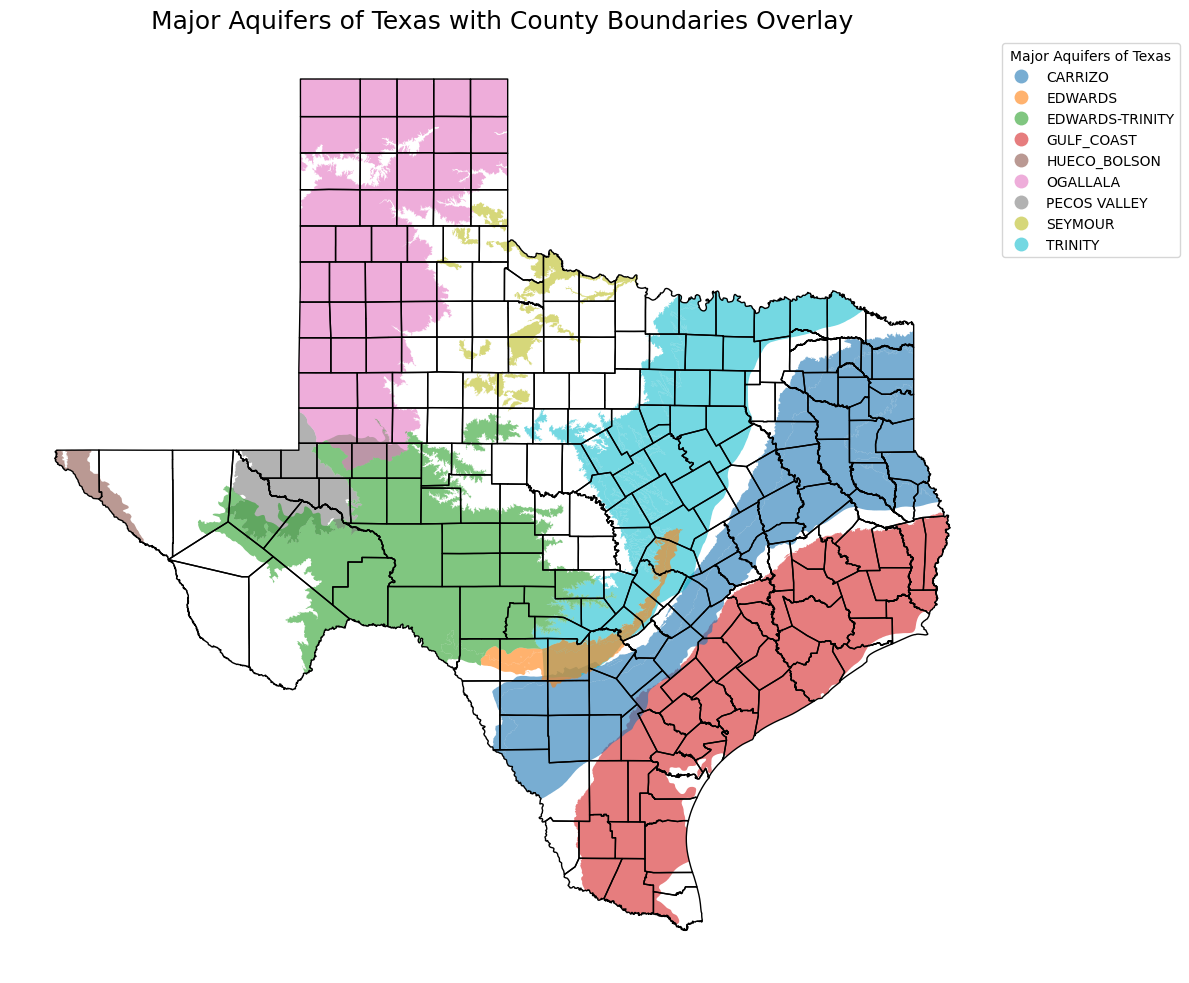

In [ ]:
if txC0.crs != task1.crs:
    # Reproject the aquifer data to match the county data's CRS
    aquifer_data = task1.to_crs(txC0.crs)

# --- 3. Plotting the Overlay Map ---

# Set up the figure and axes for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# PLOT 1: Plot the Aquifer Polygons (The colored areas)
# Use the 'AQ_NAME' column to color-code the different aquifers
aquifer_data.plot(
    column='AQ_NAME',
    ax=ax,
    legend=True,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1), # Position the legend outside the map
        'title': "Major Aquifers of Texas"
    },
    alpha=0.6,          # Semi-transparent fill to hint at overlap
    edgecolor='none'    # No outline on the aquifer polygons
)

# PLOT 2: Plot the Texas County Boundaries (The boundary lines)
txC0.plot(
    ax=ax,
    facecolor='none',  # No fill color, so the aquifers show through
    edgecolor='black', # Color of the county boundary lines
    linewidth=1      # Line thickness
)

# Optional: Add title and clean up the plot
ax.set_title('Major Aquifers of Texas with County Boundaries Overlay', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.tight_layout() # Adjust layout to make room for the legend
plt.show()

In [ ]:
! wget -q -O  Urbanized_Areas_2020.zip https://github.com/Nemipatel210/GIS/raw/374c134d3da8b2821e1b62761d465fc905bacf7f/Urbanized_Areas_2020.zip

In [ ]:
zip_ref = zipfile.ZipFile('Urbanized_Areas_2020.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
!ls

County_Boundaries.cpg
County_Boundaries.dbf
County_Boundaries.prj
County_Boundaries.shp
County_Boundaries.shp.xml
County_Boundaries.shx
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.cpg
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.dbf
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.prj
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shx
major_aquifers.zip
NEW_major_aquifers_dd.dbf
NEW_major_aquifers_dd.prj
NEW_major_aquifers_dd.sbn
NEW_major_aquifers_dd.sbx
NEW_major_aquifers_dd.shp
NEW_major_aquifers_dd.shp.xml
NEW_major_aquifers_dd.shx
NEW_major_aquifers.lyr
sample_data
test.geojson
TexasCountiesCartographic.zip
Texas_County_Boundaries_4845315375211121464.zip
TxDOT_Urbanized_Areas.cpg
TxDOT_Urbanized_Areas.dbf
TxDOT_Urbanized_Areas.prj
TxDOT_Urbanized_Areas.shp
TxDOT_Urbanized_Areas.shp.xml
TxDOT_Urbanized_Areas.shx
tx_ps2.geojson
tx_ps2.kml
Urbanized_Areas_2020.zip


In [ ]:
task2=gpd.read_file('TxDOT_Urbanized_Areas.shp')

<Axes: >

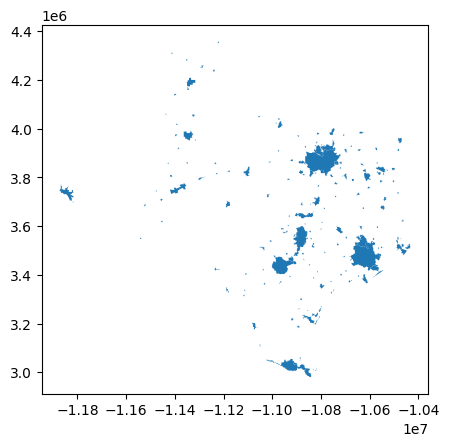

In [ ]:
task2.plot()

In [ ]:
task2.head(5)

UZA_NM  UZA_NBR FIPS_UZA_C UZA_TYPE  POP2020  GID UZA_TYPE_C  \
0    Livingston    686.0      50662      SUA     5592   70        SUA   
1  Raymondville    715.0      73612      SUA    12986   73        SUA   
2         Manor    817.0      54050      SUA    17006  161        SUA   
3   Canyon Lake    625.0      13483      SUA     7918   11        SUA   
4      Rockdale    720.0      75691      SUA     5464   75        SUA   

                                            geometry  
0  POLYGON ((-10569754.969 3591540.069, -10569816...  
1  POLYGON ((-10886757.742 3050400.681, -10886761...  
2  POLYGON ((-10856058.115 3552181.451, -10855500...  
3  POLYGON ((-10942012.01 3488611.292, -10941867....  
4  POLYGON ((-10795811.774 3589488.196, -10795779...

## Urbanized Areas of Texas with County Boundaries Overlay

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Urbanized Areas of Texas with County Boundaries Overlay')

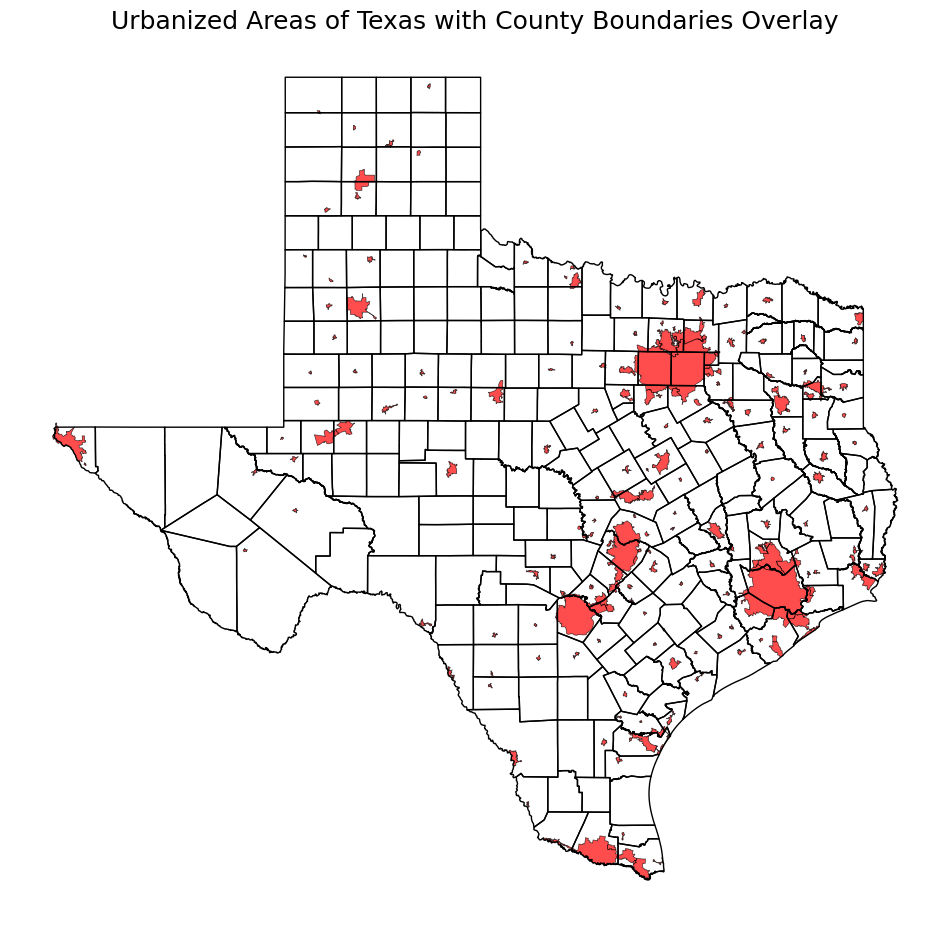

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Check if the CRS of the two GeoDataFrames match
if task2.crs != txC0.crs:
    # Reproject the urbanized areas data to match the county data's CRS
    urbanized_areas_data = task2.to_crs(txC0.crs)
else:
    urbanized_areas_data = task2

# --- Plotting the Overlay Map ---

# Set up the figure and axes for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# PLOT 1: Plot the Urbanized Areas Polygons (The colored areas)
# Use a single color for all urbanized areas or a color based on a specific attribute if desired
urbanized_areas_data.plot(
    ax=ax,
    color='red',  # Example color, you can choose another color
    alpha=0.7,    # Semi-transparent fill
    edgecolor='black', # Add a thin black edge to polygons
    linewidth=0.5,
    legend=False # No legend needed for a single color
)

# PLOT 2: Plot the Texas County Boundaries (The boundary lines)
txC0.plot(
    ax=ax,
    facecolor='none',  # No fill color, so the urbanized areas show through
    edgecolor='black', # Color of the county boundary lines
    linewidth=1      # Line thickness
)

# Optional: Add title and clean up the plot
ax.set_title('Urbanized Areas of Texas with County Boundaries Overlay', fontsize=18)
ax.set_axis_off() # Hide the coordinate axes

plt.show()

In [ ]:
#Comparison of Crop Value Ratio, Major Aquifers, and Urbanized Areas(side by side)

#Comparison of Crop Value Ratio, Major Aquifers, and Urbanized Areas(side by side)

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value to Agricultural Land Ratio by County')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Major Aquifers of Texas with County Boundaries Overlay')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Urbanized Areas of Texas with County Boundaries Overlay')

Text(0.5, 0.95, 'Comparison of Crop Value Ratio, Major Aquifers, and Urbanized Areas')

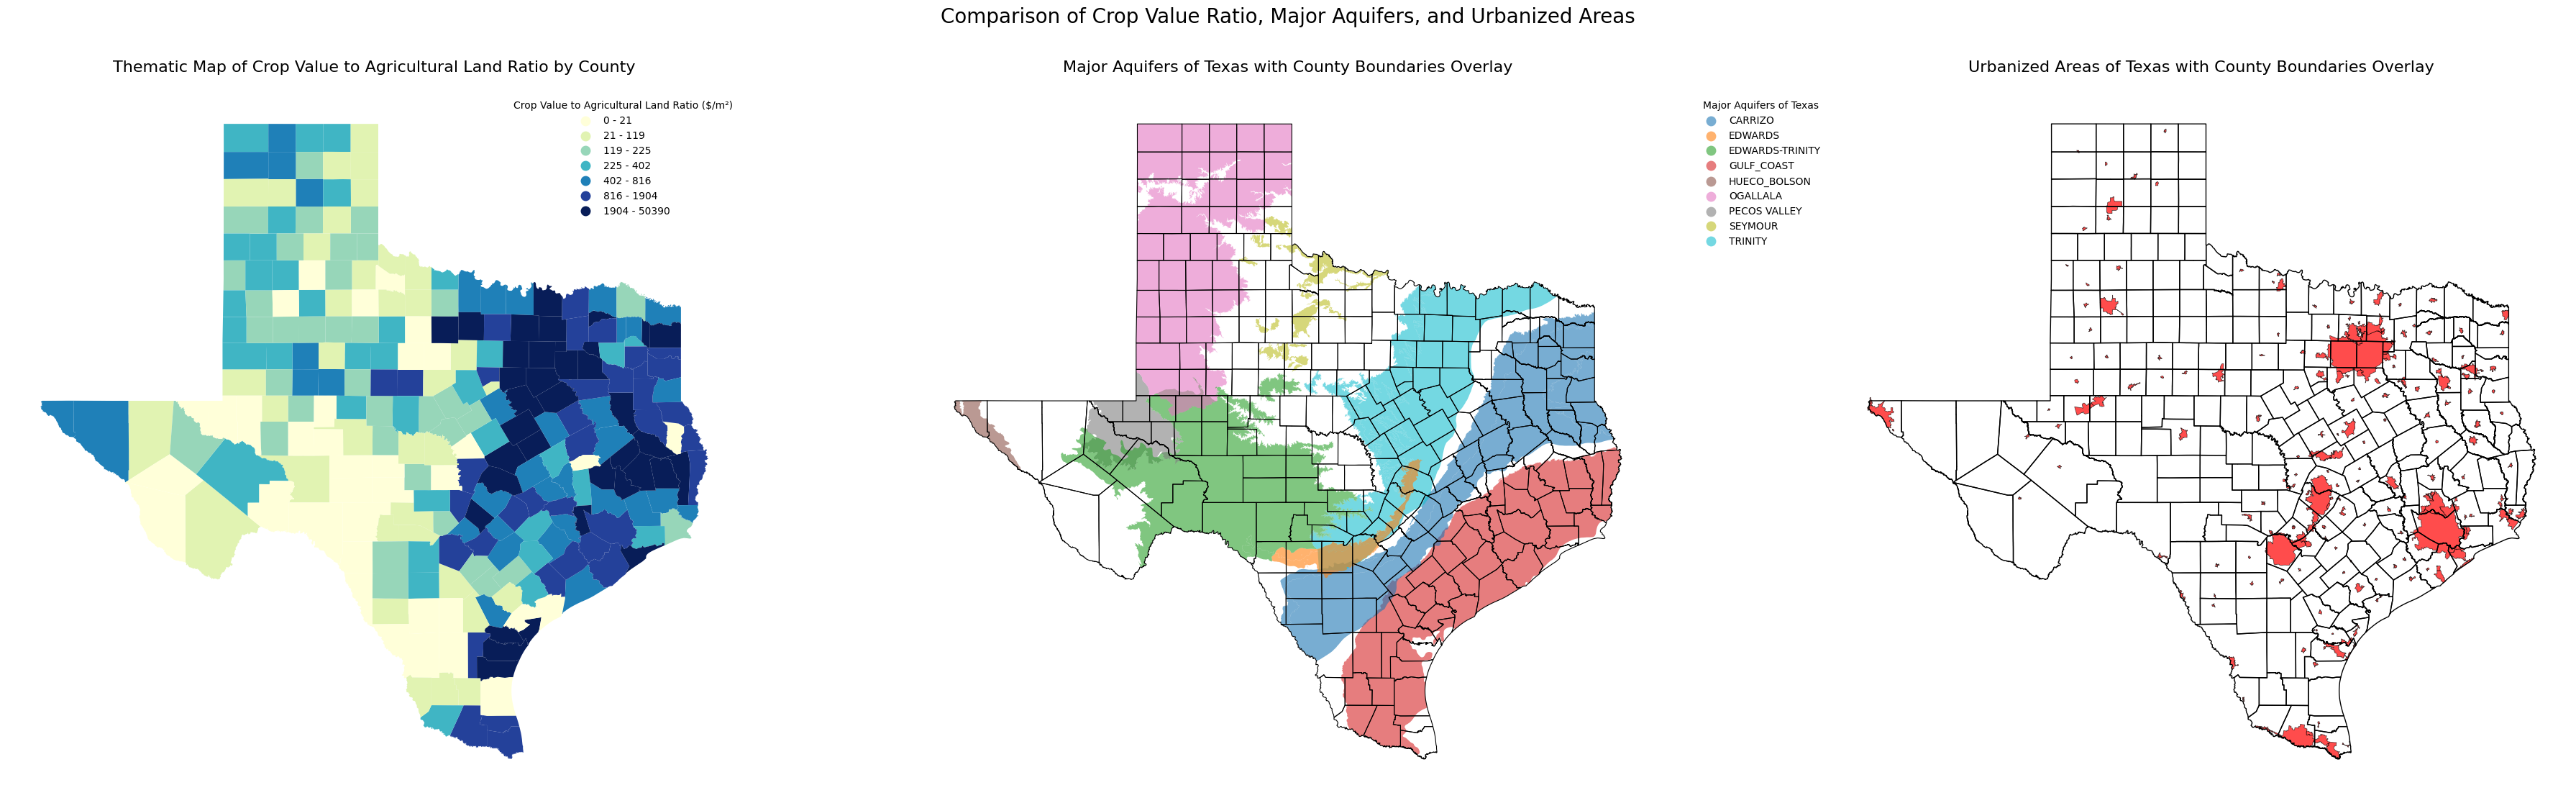

In [ ]:
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd


merged_gdf_ratio = gpd.GeoDataFrame(merged_df_selected, geometry='geometry')

merged_gdf_ratio_plot = merged_gdf_ratio.dropna(subset=['value_ratio'])

k_classes = 7
classifier = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=k_classes)

bin_edges = classifier.bins
legend_labels = []

for i in range(len(bin_edges)):
    if i == 0:
        legend_labels.append(f'0 - {bin_edges[i]:.0f}')
    else:
        legend_labels.append(f'{bin_edges[i-1]:.0f} - {bin_edges[i]:.0f}')

if txC0.crs != task1.crs:
    aquifer_data = task1.to_crs(txC0.crs)
else:
    aquifer_data = task1


if txC0.crs != task2.crs:
    urbanized_areas_data = task2.to_crs(txC0.crs)
else:
    urbanized_areas_data = task2

fig, axs = plt.subplots(1, 3, figsize=(36, 12)) # 1 row, 3 columns

ax0 = axs[0] # The first axes object (left)

# Plot the data using the defined classification
merged_gdf_ratio_plot.plot(column='value_ratio',
                           ax=ax0,
                           legend=True,
                           cmap='YlGnBu',
                           scheme='Quantiles',
                           classification_kwds={'k': k_classes},
                           legend_kwds={'loc': 'upper right',
                                        'labels': legend_labels,
                                        'title': 'Crop Value to Agricultural Land Ratio ($/m²)',
                                        'frameon': False}) # Added frameon=False for cleaner look


ax0.set_title('Thematic Map of Crop Value to Agricultural Land Ratio by County',
              fontsize=16,
              pad=20)
ax0.set_axis_off()

ax1 = axs[1] # The second axes object (middle)

# PLOT 1 (of 2): Plot the Aquifer Polygons (The colored areas)
aquifer_data.plot(
    column='AQ_NAME',
    ax=ax1,
    legend=True,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (1.05, 1),
        'title': "Major Aquifers of Texas",
        'frameon': False
    },
    alpha=0.6,
    edgecolor='none'
)


txC0.plot(
    ax=ax1,
    facecolor='none',
    edgecolor='black',
    linewidth=0.8
)


ax1.set_title('Major Aquifers of Texas with County Boundaries Overlay',
              fontsize=16,
              pad=20)
ax1.set_axis_off()



ax2 = axs[2]


urbanized_areas_data.plot(
    ax=ax2,
    color='red',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    legend=False
)


txC0.plot(
    ax=ax2,
    facecolor='none',
    edgecolor='black',
    linewidth=1
)


ax2.set_title('Urbanized Areas of Texas with County Boundaries Overlay', fontsize=16, pad=20)
ax2.set_axis_off()


plt.suptitle('Comparison of Crop Value Ratio, Major Aquifers, and Urbanized Areas', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Adjust layout to make room for the suptitle and legend
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/0d976d215d5fe847a9052e7949668e06b9c7e661/expenses_2022.csv'
expenses_2022_df = pd.read_csv(url)
display(expenses_2022_df.head(5))

Program  Year Period  Week Ending Geo Level  State  State ANSI Ag District  \
0  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
1  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
2  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
3  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   
4  CENSUS  2022   YEAR          NaN    COUNTY  TEXAS          48  BLACKLANDS   

   Ag District Code County  ...  Zip Code  Region  watershed_code  Watershed  \
0                40   BELL  ...       NaN     NaN               0        NaN   
1                40   BELL  ...       NaN     NaN               0        NaN   
2                40   BELL  ...       NaN     NaN               0        NaN   
3                40   BELL  ...       NaN     NaN               0        NaN   
4                40   BELL  ...       NaN     NaN               0        NaN   

     Commodity                                          Data Item Domain  \
0  AG SERVICES  AG SERVICES, CUSTOM SERVICES FOR LIVESTOCK, IN...  TOTAL   
1  AG SERVICES  AG SERVICES, CUSTOM SERVICES FOR LIVESTOCK, IN...  TOTAL   
2  AG SERVICES   AG SERVICES, CUSTOMWORK - EXPENSE, MEASURED IN $  TOTAL   
3  AG SERVICES  AG SERVICES, CUSTOMWORK - OPERATIONS WITH EXPENSE  TOTAL   
4  AG SERVICES  AG SERVICES, MACHINERY RENTAL - EXPENSE, MEASU...  TOTAL   

  Domain Category      Value CV (%)  
0   NOT SPECIFIED  1,992,000    (L)  
1   NOT SPECIFIED        941    5.7  
2   NOT SPECIFIED  2,421,000    (L)  
3   NOT SPECIFIED        355   10.8  
4   NOT SPECIFIED  1,020,000    (L)  

[5 rows x 21 columns]

#aggregate data: groupby+agg

In [ ]:
# Ensure the 'Value' column is numeric
expenses_2022_df['Value'] = pd.to_numeric(expenses_2022_df['Value'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False).str.replace(' (Z)', '', regex=False), errors='coerce')

# Group by 'County' and sum the 'Value' column
county_expenses = expenses_2022_df.groupby('County')['Value'].sum().reset_index()

# Rename the 'Value' column to 'total_expense'
county_expenses = county_expenses.rename(columns={'Value': 'total_expense'})

display(county_expenses.head())

County  total_expense
0  ANDERSON    374629402.0
1   ANDREWS     30535207.0
2  ANGELINA    114856630.0
3   ARANSAS      7065233.0
4    ARCHER    189653424.0

In [ ]:
county_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         254 non-null    object 
 1   total_expense  254 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [ ]:
# Merge county_expenses with tx_crop2022_plot on county name
county_expenses_gdf = tx_crop2022_plot.merge(county_expenses, left_on='CNTY_NM', right_on='County', how='outer')

# Select only the desired columns and rename CNTY_NM to County
county_expenses_gdf = county_expenses_gdf[['CNTY_NM', 'total_expense', 'geometry']].rename(columns={'CNTY_NM': 'County'})

display(county_expenses_gdf.head())

County  total_expense                                           geometry
0  ANDERSON    374629402.0  POLYGON ((-10622770.07 3774372.952, -10622743....
1   ANDREWS     30535207.0  POLYGON ((-11452352.064 3832169.96, -11452055....
2  ANGELINA    114856630.0  POLYGON ((-10560243.006 3701241.912, -10560220...
3   ARANSAS      7065233.0  POLYGON ((-10775558.316 3283921.376, -10776779...
4    ARCHER    189653424.0  POLYGON ((-10956443.534 3973368.927, -10956442...

# centroids thematic maps

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Total Agricultural Expense by County (2022)')

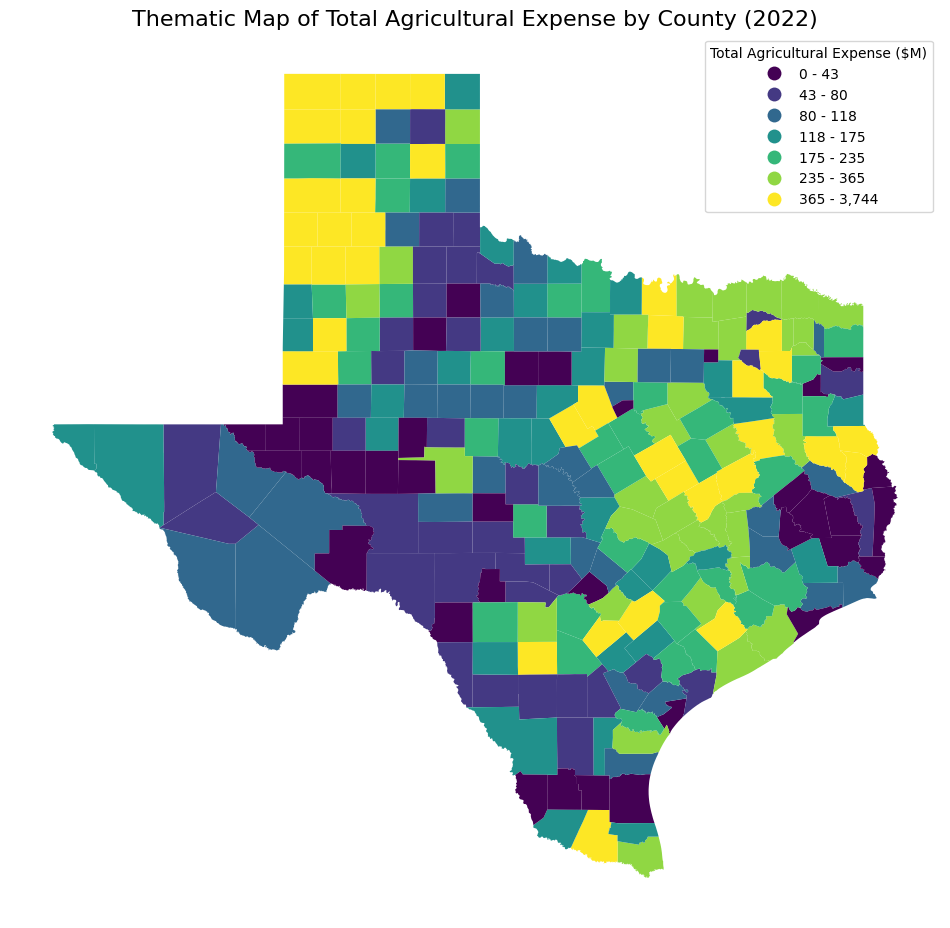

In [ ]:
import mapclassify
import matplotlib.pyplot as plt
import geopandas as gpd

# Ensure county_expenses_gdf is a GeoDataFrame (it should be after the merge with tx_crop2022_plot)
# If it's not already, you might need to explicitly create it:
# county_expenses_gdf = gpd.GeoDataFrame(county_expenses_gdf, geometry='geometry')


# Drop rows with NaN in 'total_expense' before plotting
county_expenses_gdf_plot = county_expenses_gdf.dropna(subset=['total_expense']).set_geometry('geometry')

# Define the classification scheme (e.g., Quantiles) and number of classes
k_classes = 7 # You can adjust the number of classes
classifier = mapclassify.Quantiles(county_expenses_gdf_plot['total_expense'], k=k_classes)

# Get the bin edges for the legend
bin_edges = classifier.bins
legend_labels = []

# Create legend labels with formatted values, showing in millions and as integers
for i in range(len(bin_edges)):
    if i == 0:
        # Assuming the minimum is close to 0 or setting it to 0 for a cleaner look
        legend_labels.append(f'0 - {bin_edges[i]/1000000:,.0f}') # Divide by 1e6 and format to 0 decimal places
    else:
        legend_labels.append(f'{bin_edges[i-1]/1000000:,.0f} - {bin_edges[i]/1000000:,.0f}') # Divide by 1e6 and format to 0 decimal places


# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the defined classification
county_expenses_gdf_plot.plot(column='total_expense',
                           ax=ax,
                           legend=True,
                           cmap='viridis', # You can change the colormap
                           scheme='Quantiles',
                           classification_kwds={'k': k_classes},
                           legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                        'title': 'Total Agricultural Expense ($M)'}) # Update title for millions


ax.set_title('Thematic Map of Total Agricultural Expense by County (2022)', fontsize=16)
ax.set_axis_off()
plt.show()

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Centroid Map of Total Agricultural Expense by County (2022)')

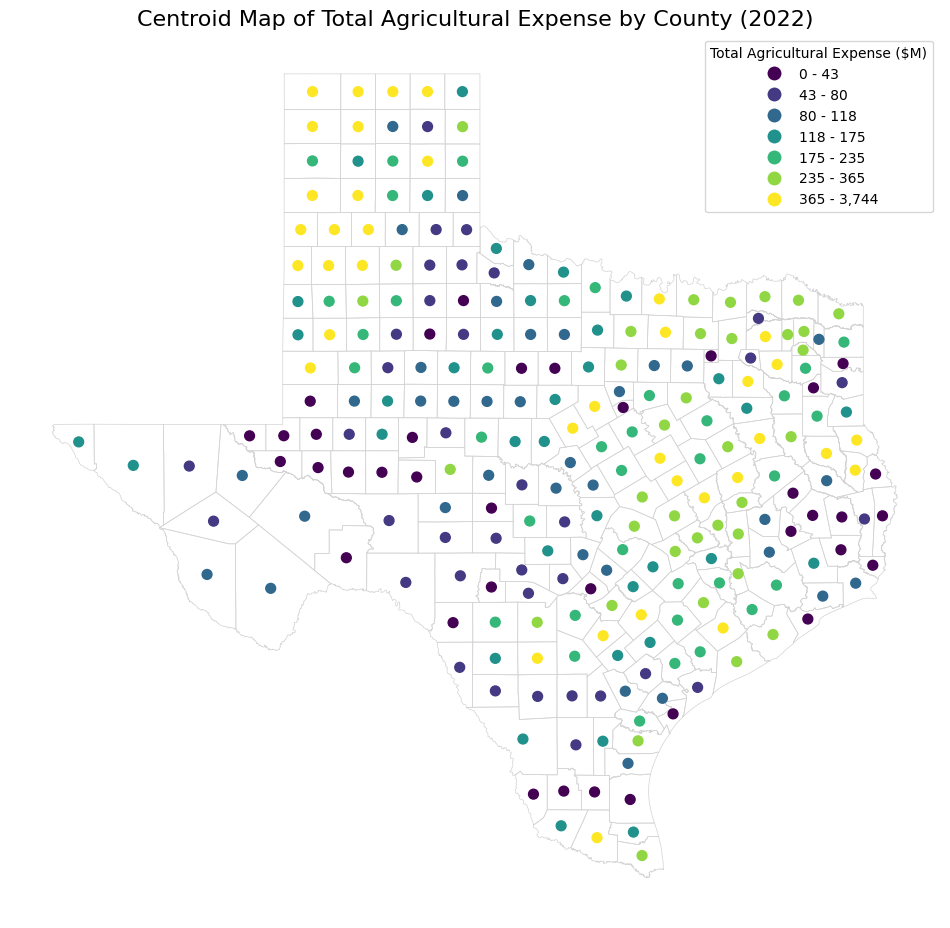

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify

# Ensure county_expenses_gdf is a GeoDataFrame and has the 'geometry' column
# (It should be from the previous merge)

# Drop rows with NaN in 'total_expense' before plotting
county_expenses_gdf_plot = county_expenses_gdf.dropna(subset=['total_expense']).set_geometry('geometry')


# Calculate the centroids of the county polygons
county_expenses_gdf_plot['centroid_geometry'] = county_expenses_gdf_plot.geometry.centroid

# Create a new GeoDataFrame with the centroid geometries
county_expenses_centroids = county_expenses_gdf_plot.set_geometry('centroid_geometry')

# Define the classification scheme (e.g., Quantiles) and number of classes for coloring
k_classes = 7 # Use the same number of classes as the thematic map for consistency
classifier = mapclassify.Quantiles(county_expenses_centroids['total_expense'], k=k_classes)

# Get the bin edges for the legend (using the same binning as the thematic map)
bin_edges = classifier.bins
legend_labels = []

# Create legend labels with formatted values, showing in millions and as integers
for i in range(len(bin_edges)):
    if i == 0:
        legend_labels.append(f'0 - {bin_edges[i]/1000000:,.0f}')
    else:
        legend_labels.append(f'{bin_edges[i-1]/1000000:,.0f} - {bin_edges[i]/1000000:,.0f}')


# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the county boundaries in the background
county_expenses_gdf_plot.plot(ax=ax, facecolor='none', edgecolor='lightgray', linewidth=0.5)

# Plot the centroids, colored by total expense
county_expenses_centroids.plot(column='total_expense',
                               ax=ax,
                               legend=True,
                               cmap='viridis', # Use the same colormap as the thematic map
                               scheme='Quantiles',
                               classification_kwds={'k': k_classes},
                               legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                            'title': 'Total Agricultural Expense ($M)'},
                               markersize=50) # Adjust the size of the centroid markers


ax.set_title('Centroid Map of Total Agricultural Expense by County (2022)', fontsize=16)
ax.set_axis_off()
plt.show()

##Texas: Crop Value Ratio & Agricultural Expense by County (2022)

Text(0.5, 1.0, 'Texas: Crop Value Ratio & Agricultural Expense by County (2022)')

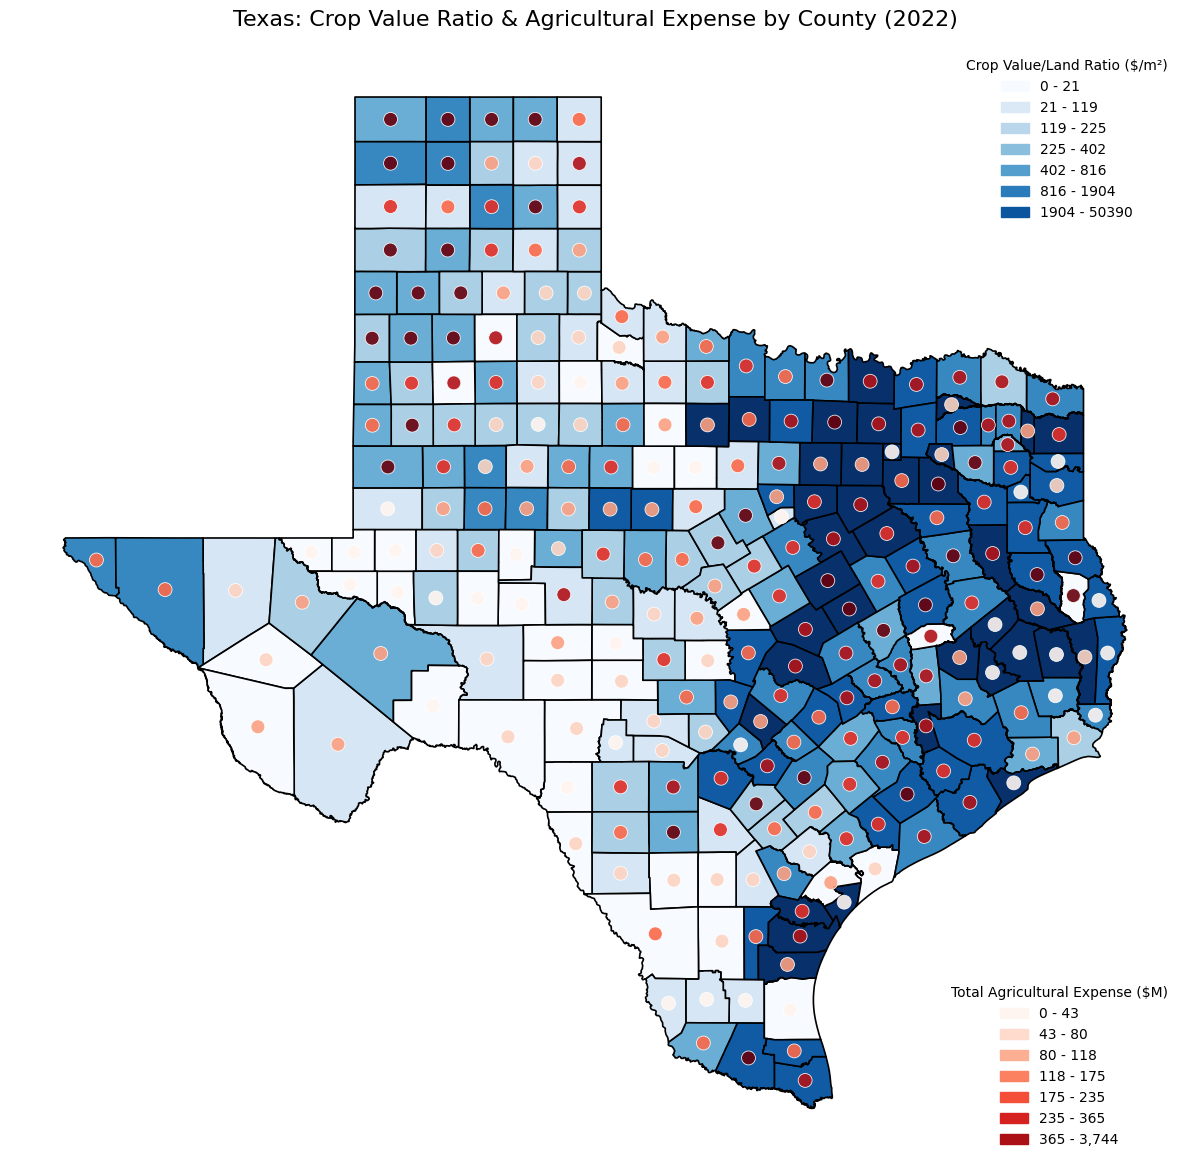

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# --- Plot 1: Thematic Map (Crop Value Ratio) ---
merged_gdf_ratio_plot = merged_gdf_ratio_plot.set_geometry('geometry')
k_classes = 7
classifier_ratio = mapclassify.Quantiles(merged_gdf_ratio_plot['value_ratio'], k=k_classes)
bin_edges_ratio = classifier_ratio.bins
legend_labels_ratio = [f'{0 if i==0 else bin_edges_ratio[i-1]:.0f} - {bin_edges_ratio[i]:.0f}' for i in range(len(bin_edges_ratio))]

ratio_plot = merged_gdf_ratio_plot.plot(
    column='value_ratio',
    ax=ax,
    cmap='Blues',
    scheme='Quantiles',
    edgecolor='Black',
    classification_kwds={'k': k_classes},
    linewidth=1.2,
    legend=False  # turn off GeoPandas legend
)

# --- Plot 2: Centroid Map (Total Agricultural Expense) ---
county_expenses_centroids = county_expenses_centroids.set_geometry('centroid_geometry')
classifier_expense = mapclassify.Quantiles(county_expenses_centroids['total_expense'], k=k_classes)
bin_edges_expense = classifier_expense.bins
legend_labels_expense = [f'{0 if i==0 else bin_edges_expense[i-1]/1e6:,.0f} - {bin_edges_expense[i]/1e6:,.0f}' for i in range(len(bin_edges_expense))]

expense_plot = county_expenses_centroids.plot(
    column='total_expense',
    ax=ax,
    cmap='Reds',
    scheme='Quantiles',
    classification_kwds={'k': k_classes},
    markersize=100,
    edgecolor='White',
    linewidth=0.6,
    alpha=0.9,
    legend=False  # turn off GeoPandas legend
)

# --- Create two custom legends manually ---
# Legend 1: Crop Value/Land Ratio (Greens)
green_patches = [Patch(color=plt.cm.Blues(i / k_classes), label=label) for i, label in enumerate(legend_labels_ratio)]
legend1 = ax.legend(handles=green_patches, title='Crop Value/Land Ratio ($/m²)', loc='upper right', frameon=False)

# Add the first legend to the axis
ax.add_artist(legend1)

# Legend 2: Total Agricultural Expense (Reds)
red_patches = [Patch(color=plt.cm.Reds(i / k_classes), label=label) for i, label in enumerate(legend_labels_expense)]
legend2 = ax.legend(handles=red_patches, title='Total Agricultural Expense ($M)', loc='lower right', frameon=False)

# --- Final touch ---
ax.set_title('Texas: Crop Value Ratio & Agricultural Expense by County (2022)', fontsize=16, pad=15)
ax.set_axis_off()

plt.tight_layout()
plt.show()
